In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
data_path = '/content/american_bankruptcy.csv'  # Replace with your actual dataset path
dataset = pd.read_csv(data_path)

# Assign meaningful column names
column_names = [
    'company_name', 'status_label', 'year', 'Current_Assets', 'Cost_of_Goods_Sold',
    'Depreciation_Amortization', 'EBITDA', 'Inventory', 'Net_Income',
    'Total_Receivables', 'Market_Value', 'Net_Sales', 'Total_Assets',
    'Total_Long_Term_Debt', 'EBIT', 'Gross_Profit', 'Total_Current_Liabilities',
    'Retained_Earnings', 'Total_Revenue', 'Total_Liabilities', 'Total_Operating_Expenses'
]
dataset.columns = column_names

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())

# For each column, replace "-" and convert the column names to lowercase
dataset.columns = [col.replace('-', '').lower() for col in dataset.columns]

# Select only numeric columns for median calculation
numeric_columns = dataset.select_dtypes(include=[np.number])


# Display summary statistics for the dataset
print("\nSummary statistics for the dataset:")
print(numeric_columns.describe())

# Display the median for all columns
print("\nMedian values for the dataset:")
print(numeric_columns.median())

# Display the mean for all columns
print("\nMean values for the dataset:")
print(numeric_columns.mean())


First 5 rows of the dataset:
  company_name status_label  year  Current_Assets  Cost_of_Goods_Sold  \
0          C_1        alive  1999         511.267             833.107   
1          C_1        alive  2000         485.856             713.811   
2          C_1        alive  2001         436.656             526.477   
3          C_1        alive  2002         396.412             496.747   
4          C_1        alive  2003         432.204             523.302   

   Depreciation_Amortization  EBITDA  Inventory  Net_Income  \
0                     18.373  89.031    336.018      35.163   
1                     18.577  64.367    320.590      18.531   
2                     22.496  27.207    286.588     -58.939   
3                     27.172  30.745    259.954     -12.410   
4                     26.680  47.491    247.245       3.504   

   Total_Receivables  ...  Net_Sales  Total_Assets  Total_Long_Term_Debt  \
0            128.348  ...   1024.333       740.998               180.447   
1


Percentage distribution of target labels:
status_label
alive     93.3657
failed     6.6343
Name: count, dtype: float64


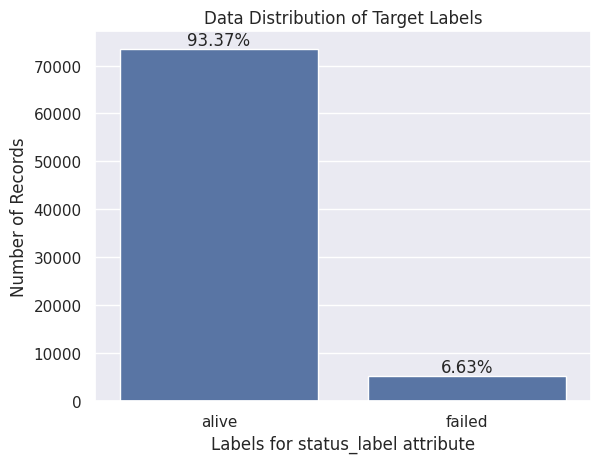

In [5]:
# Calculate the percentage distribution of the target labels
total_len = len(dataset['status_label'])
percentage_labels = (dataset['status_label'].value_counts() / total_len) * 100
print("\nPercentage distribution of target labels:")
print(percentage_labels)

# Graphical representation of the target label percentage
sns.set()
sns.countplot(x='status_label', data=dataset).set_title('Data Distribution of Target Labels')
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 2,
            '{:.2f}%'.format(100 * (height / total_len)),
            fontsize=12, ha='center', va='bottom')

sns.set(font_scale=1.5)
ax.set_xlabel("Labels for status_label attribute")
ax.set_ylabel("Number of Records")
plt.show()


In [6]:
# Check for missing values and count the number of missing records for each column
missing_values = dataset.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
company_name                 0
status_label                 0
year                         0
current_assets               0
cost_of_goods_sold           0
depreciation_amortization    0
ebitda                       0
inventory                    0
net_income                   0
total_receivables            0
market_value                 0
net_sales                    0
total_assets                 0
total_long_term_debt         0
ebit                         0
gross_profit                 0
total_current_liabilities    0
retained_earnings            0
total_revenue                0
total_liabilities            0
total_operating_expenses     0
dtype: int64


In [8]:
zero_counts = (dataset == 0).sum()
print("\nNumber of records with zero values for each column:")
print(zero_counts)


Number of records with zero values for each column:
company_name                     0
status_label                     0
year                             0
current_assets                   0
cost_of_goods_sold             306
depreciation_amortization      633
ebitda                           3
inventory                    19701
net_income                       7
total_receivables             2205
market_value                     0
net_sales                        0
total_assets                     0
total_long_term_debt         20884
ebit                             0
gross_profit                    25
total_current_liabilities        0
retained_earnings                0
total_revenue                    0
total_liabilities                0
total_operating_expenses         1
dtype: int64


<ipython-input-9-e261c281f2fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")  # Use palette for better visualization


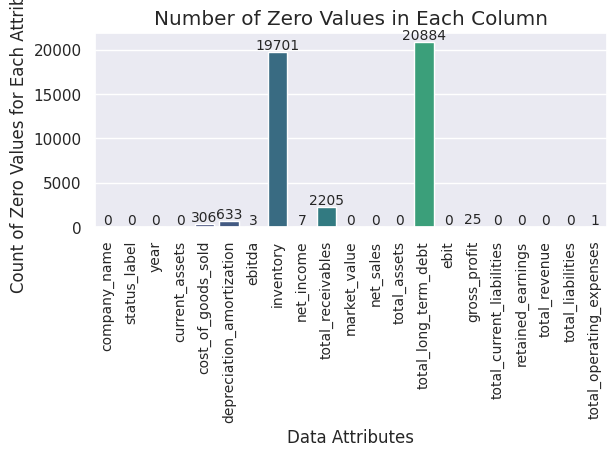

In [9]:
# Calculate the number of zero values for each column
x = dataset.columns
y = (dataset == 0).sum()

# Create a bar plot
sns.set()
sns.barplot(x=x, y=y, palette="viridis")  # Use palette for better visualization
ax = plt.gca()

# Add annotations on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0,
            height + 2,
            int(height),
            fontsize=10, ha='center', va='bottom')

# Configure plot settings
sns.set(font_scale=1.2)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of Zero Values for Each Attribute")
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size
plt.title("Number of Zero Values in Each Column")
plt.tight_layout()
plt.show()

In [11]:
# Identify columns with zeros
columns_with_zeros = ['cost_of_goods_sold', 'depreciation_amortization', 'ebitda',
                      'inventory', 'net_income', 'total_receivables', 'gross_profit',
                      'total_long_term_debt', 'total_operating_expenses']

# Decide which columns to replace with median or mean
columns_replace_median = [
    'cost_of_goods_sold', 'depreciation_amortization', 'ebitda',
    'inventory', 'gross_profit'
]  # Justification: Outliers and skewness likely
columns_replace_mean = [
    'net_income', 'total_receivables', 'total_long_term_debt',
    'total_operating_expenses'
]  # Justification: Relatively normal distribution

# Replace zeros with median for the specified columns
for col in columns_replace_median:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].replace(0, median_value)

# Replace zeros with mean for the specified columns
for col in columns_replace_mean:
    mean_value = dataset[col].mean()
    dataset[col] = dataset[col].replace(0, mean_value)

# Verify the results
print("\nProportion of zeros after updated strategy:")
print((dataset[columns_with_zeros] == 0).sum() / len(dataset) * 100)



Proportion of zeros after updated strategy:
cost_of_goods_sold           0.0
depreciation_amortization    0.0
ebitda                       0.0
inventory                    0.0
net_income                   0.0
total_receivables            0.0
gross_profit                 0.0
total_long_term_debt         0.0
total_operating_expenses     0.0
dtype: float64


Correlation

Correlation Matrix:
                               year  current_assets  cost_of_goods_sold  \
year                       1.000000        0.096764            0.065335   
current_assets             0.096764        1.000000            0.660560   
cost_of_goods_sold         0.065335        0.660560            1.000000   
depreciation_amortization  0.078080        0.659162            0.601317   
ebitda                     0.082693        0.812872            0.674877   
inventory                  0.074149        0.638577            0.780875   
net_income                 0.063237        0.657365            0.517077   
total_receivables          0.082225        0.851956            0.662873   
market_value               0.080689        0.826568            0.556607   
net_sales                  0.075471        0.758712            0.975962   
total_assets               0.100649        0.824172            0.681134   
total_long_term_debt       0.121539        0.641368            0.479109   
ebit 

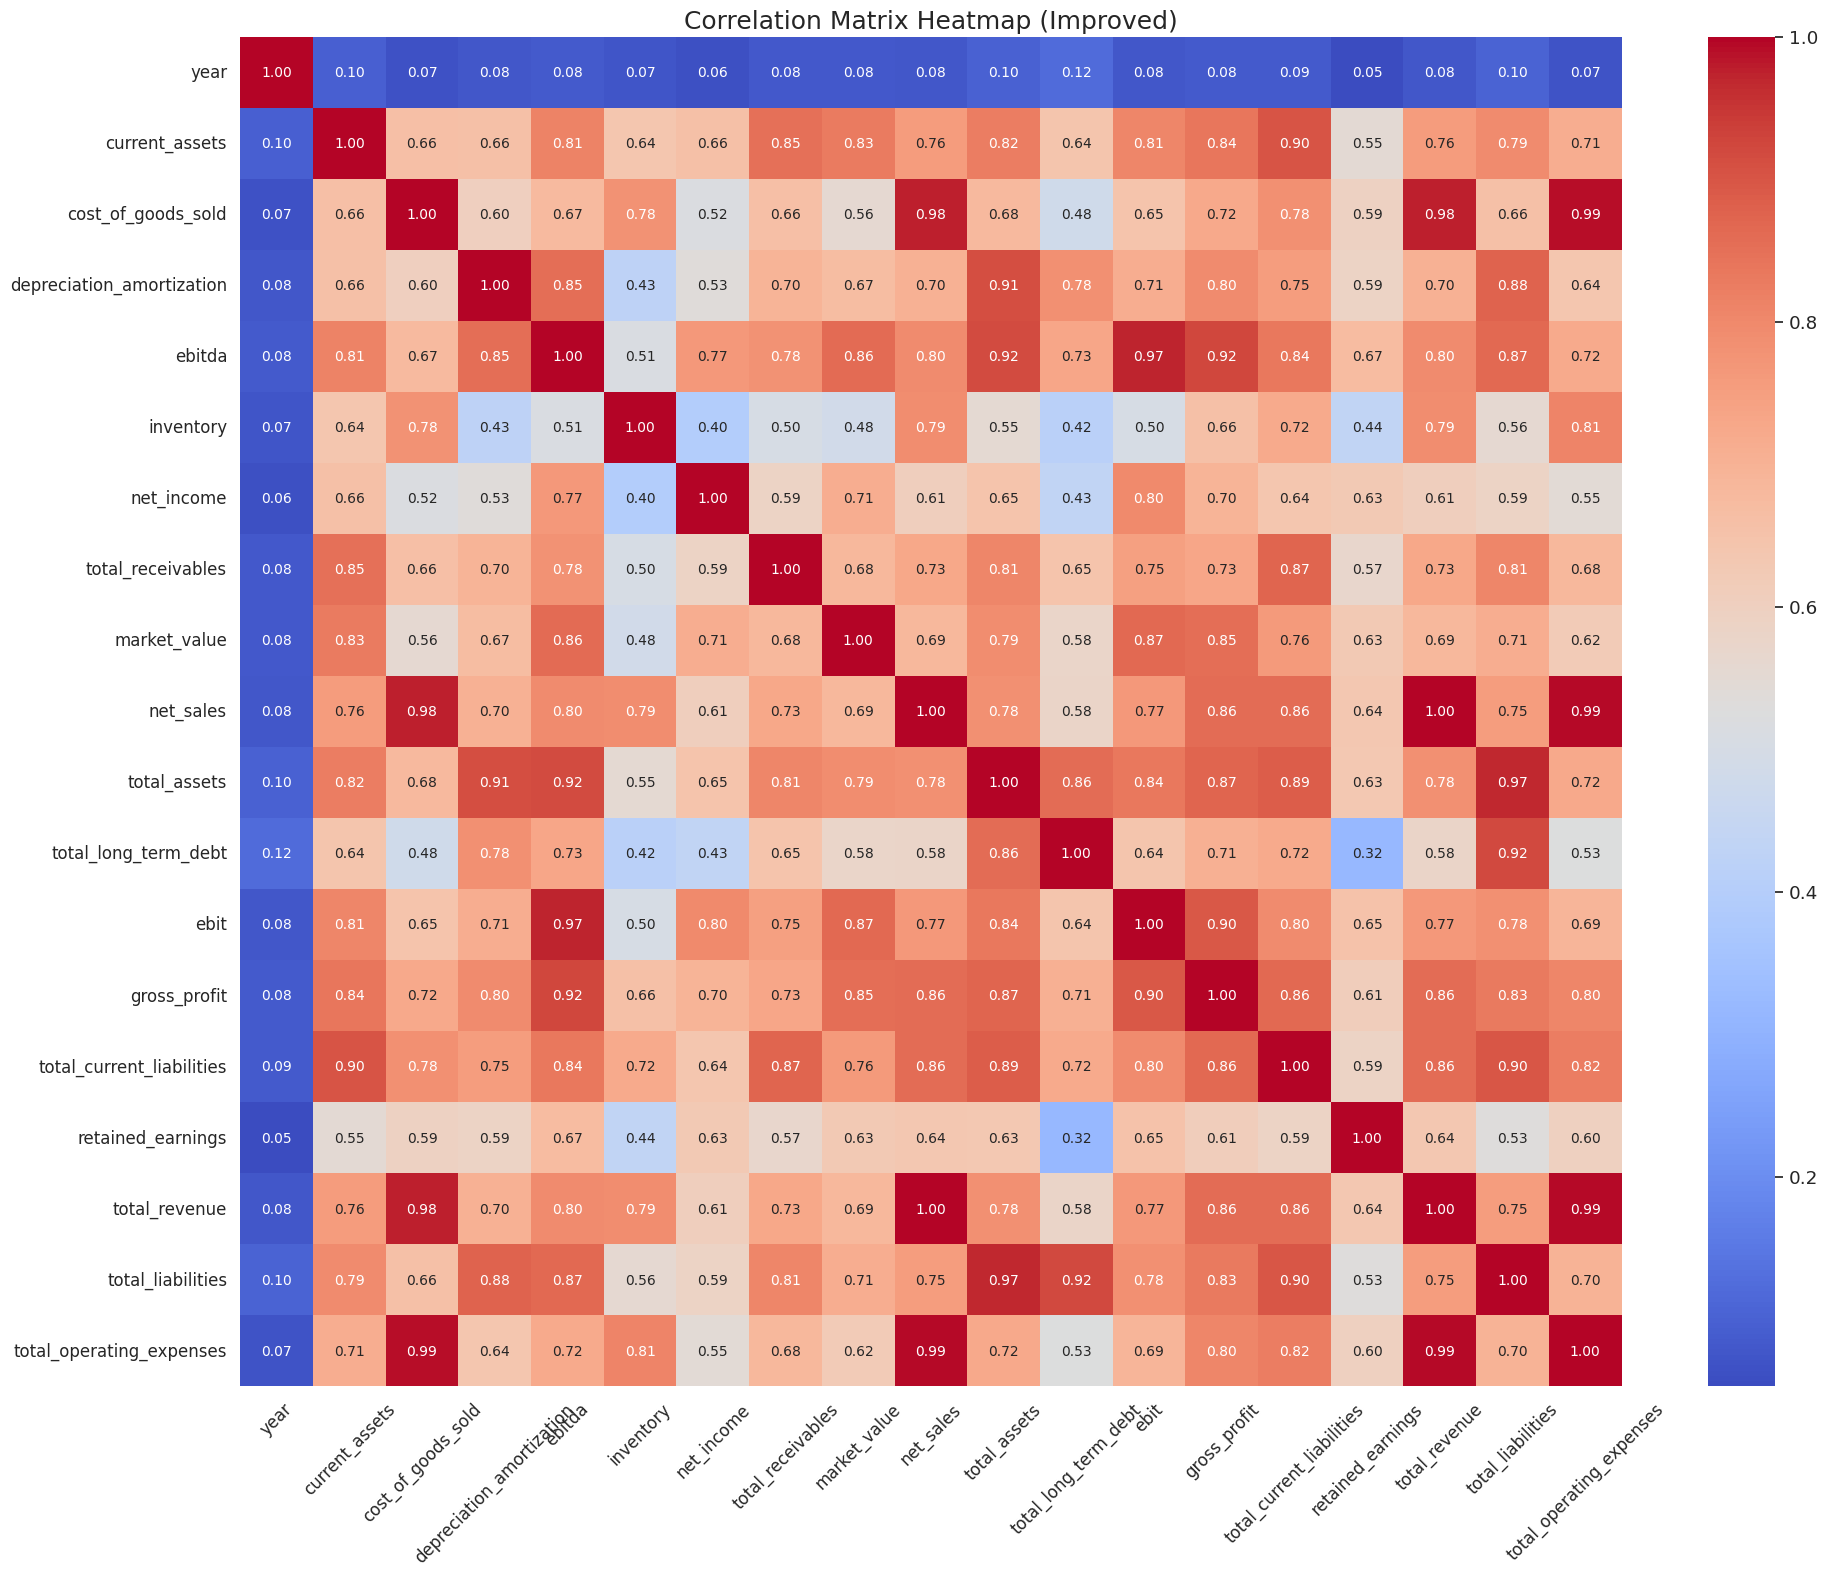

In [15]:
# List of unnecessary columns to drop
columns_to_drop = ['inventory_was_zero', 'total_receivables_was_zero', 'total_long_term_debt_was_zero']

# Drop unnecessary columns if they exist in the dataset
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

# Compute the correlation matrix for numerical columns
correlation_matrix = dataset.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))  # Increase figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 10}  # Adjust annotation size
)
plt.title("Correlation Matrix Heatmap (Improved)", fontsize=18)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.tight_layout()  # Ensure the plot fits into the figure
plt.show()

Outliers Detection

Processing Outliers for Feature: current_assets


<Figure size 1500x1000 with 0 Axes>

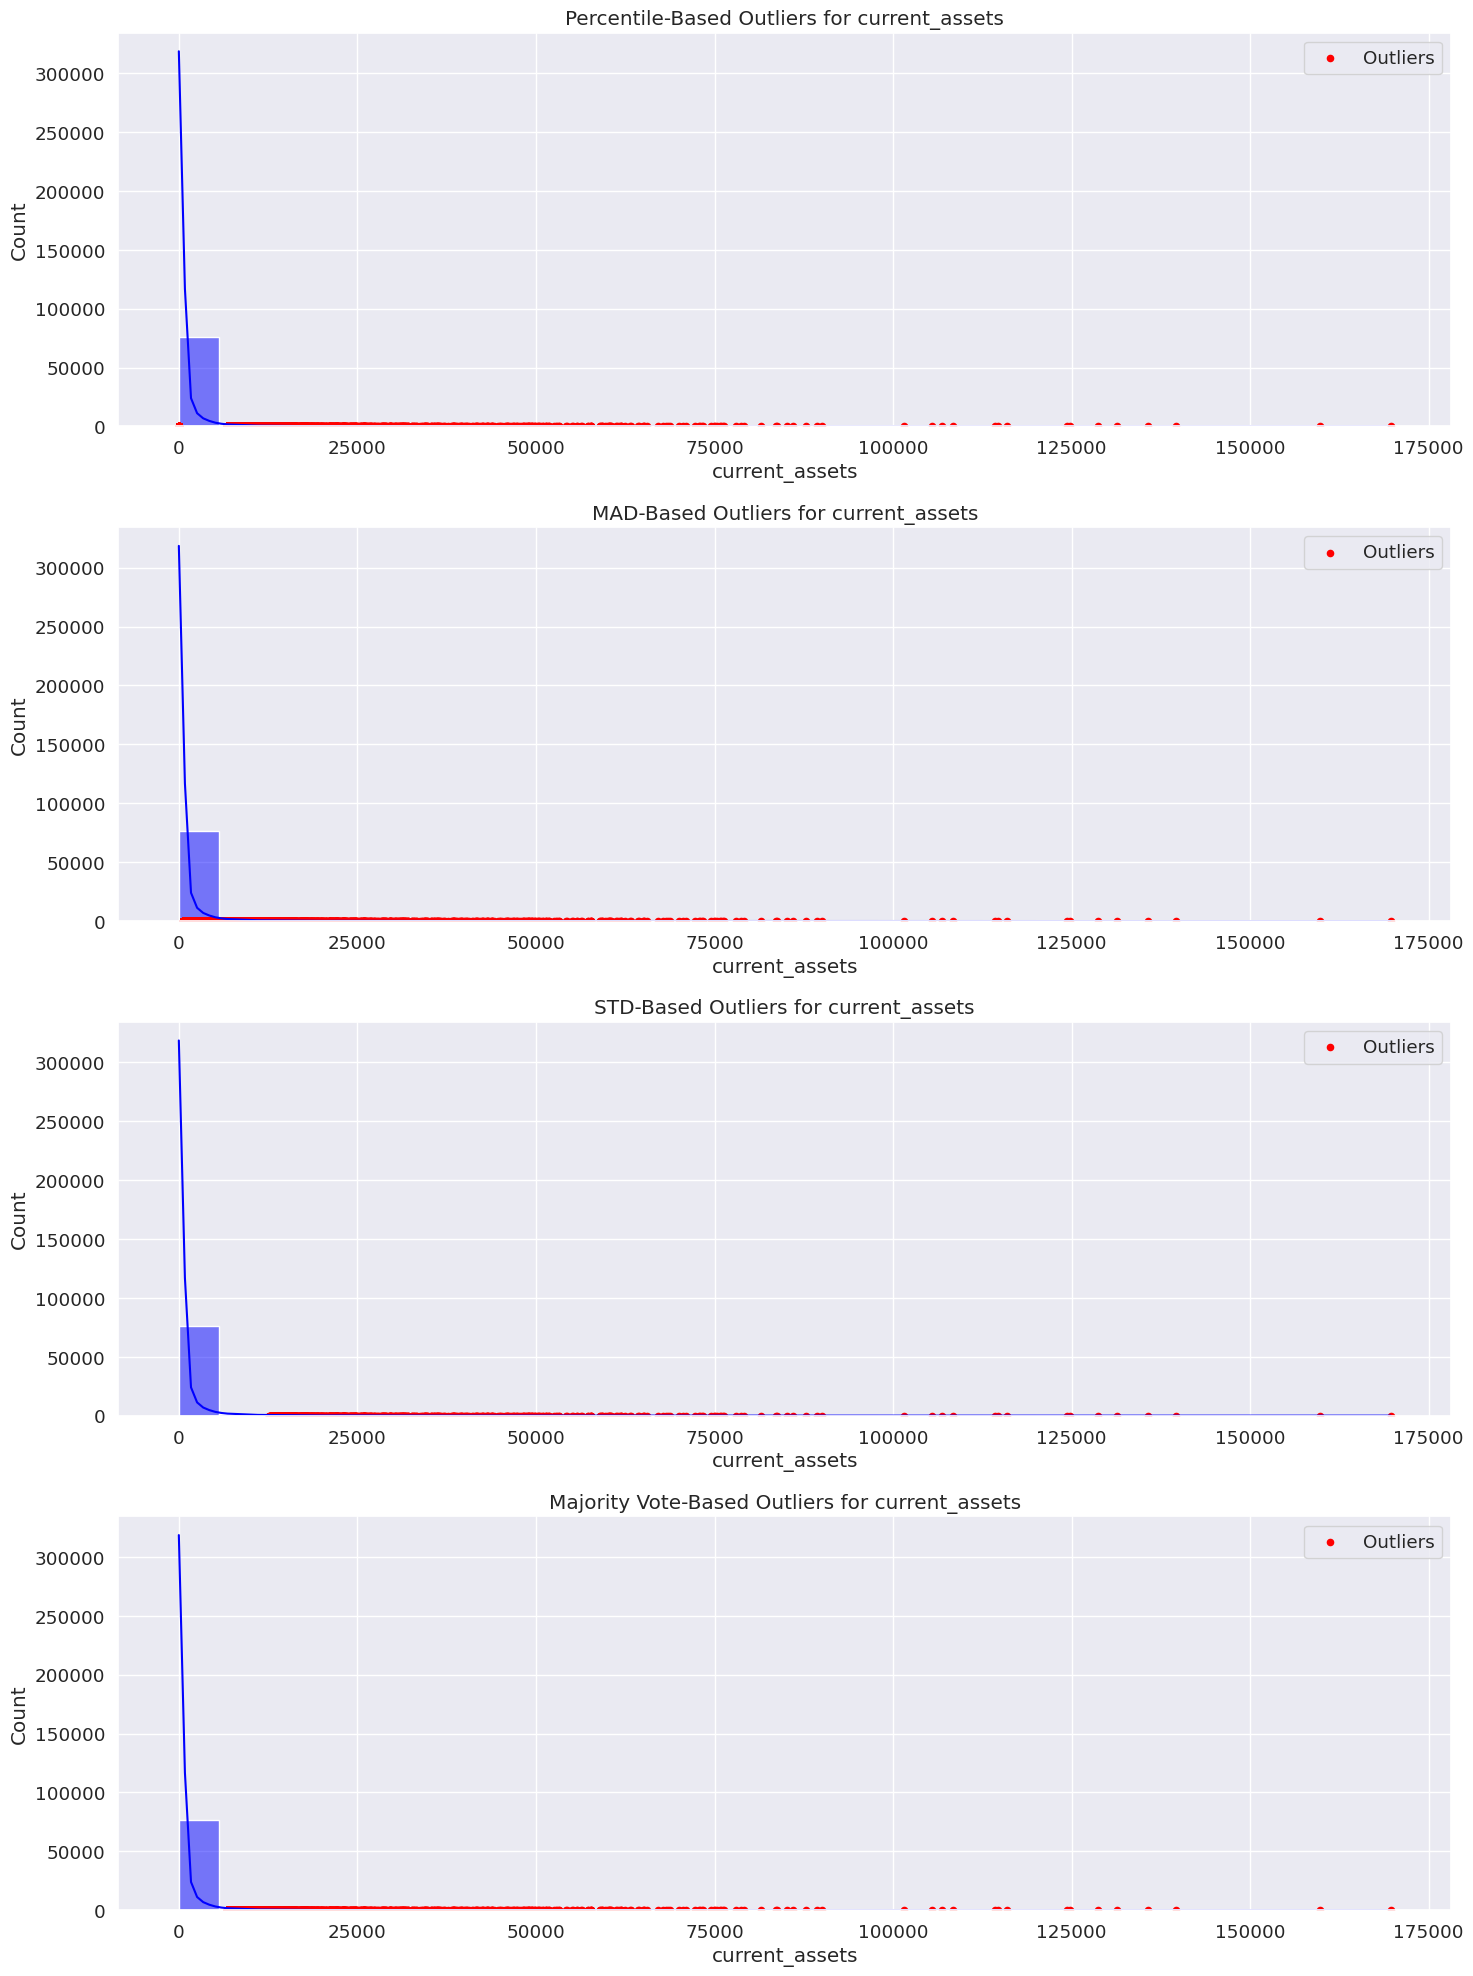

Processing Outliers for Feature: cost_of_goods_sold


<Figure size 1500x1000 with 0 Axes>

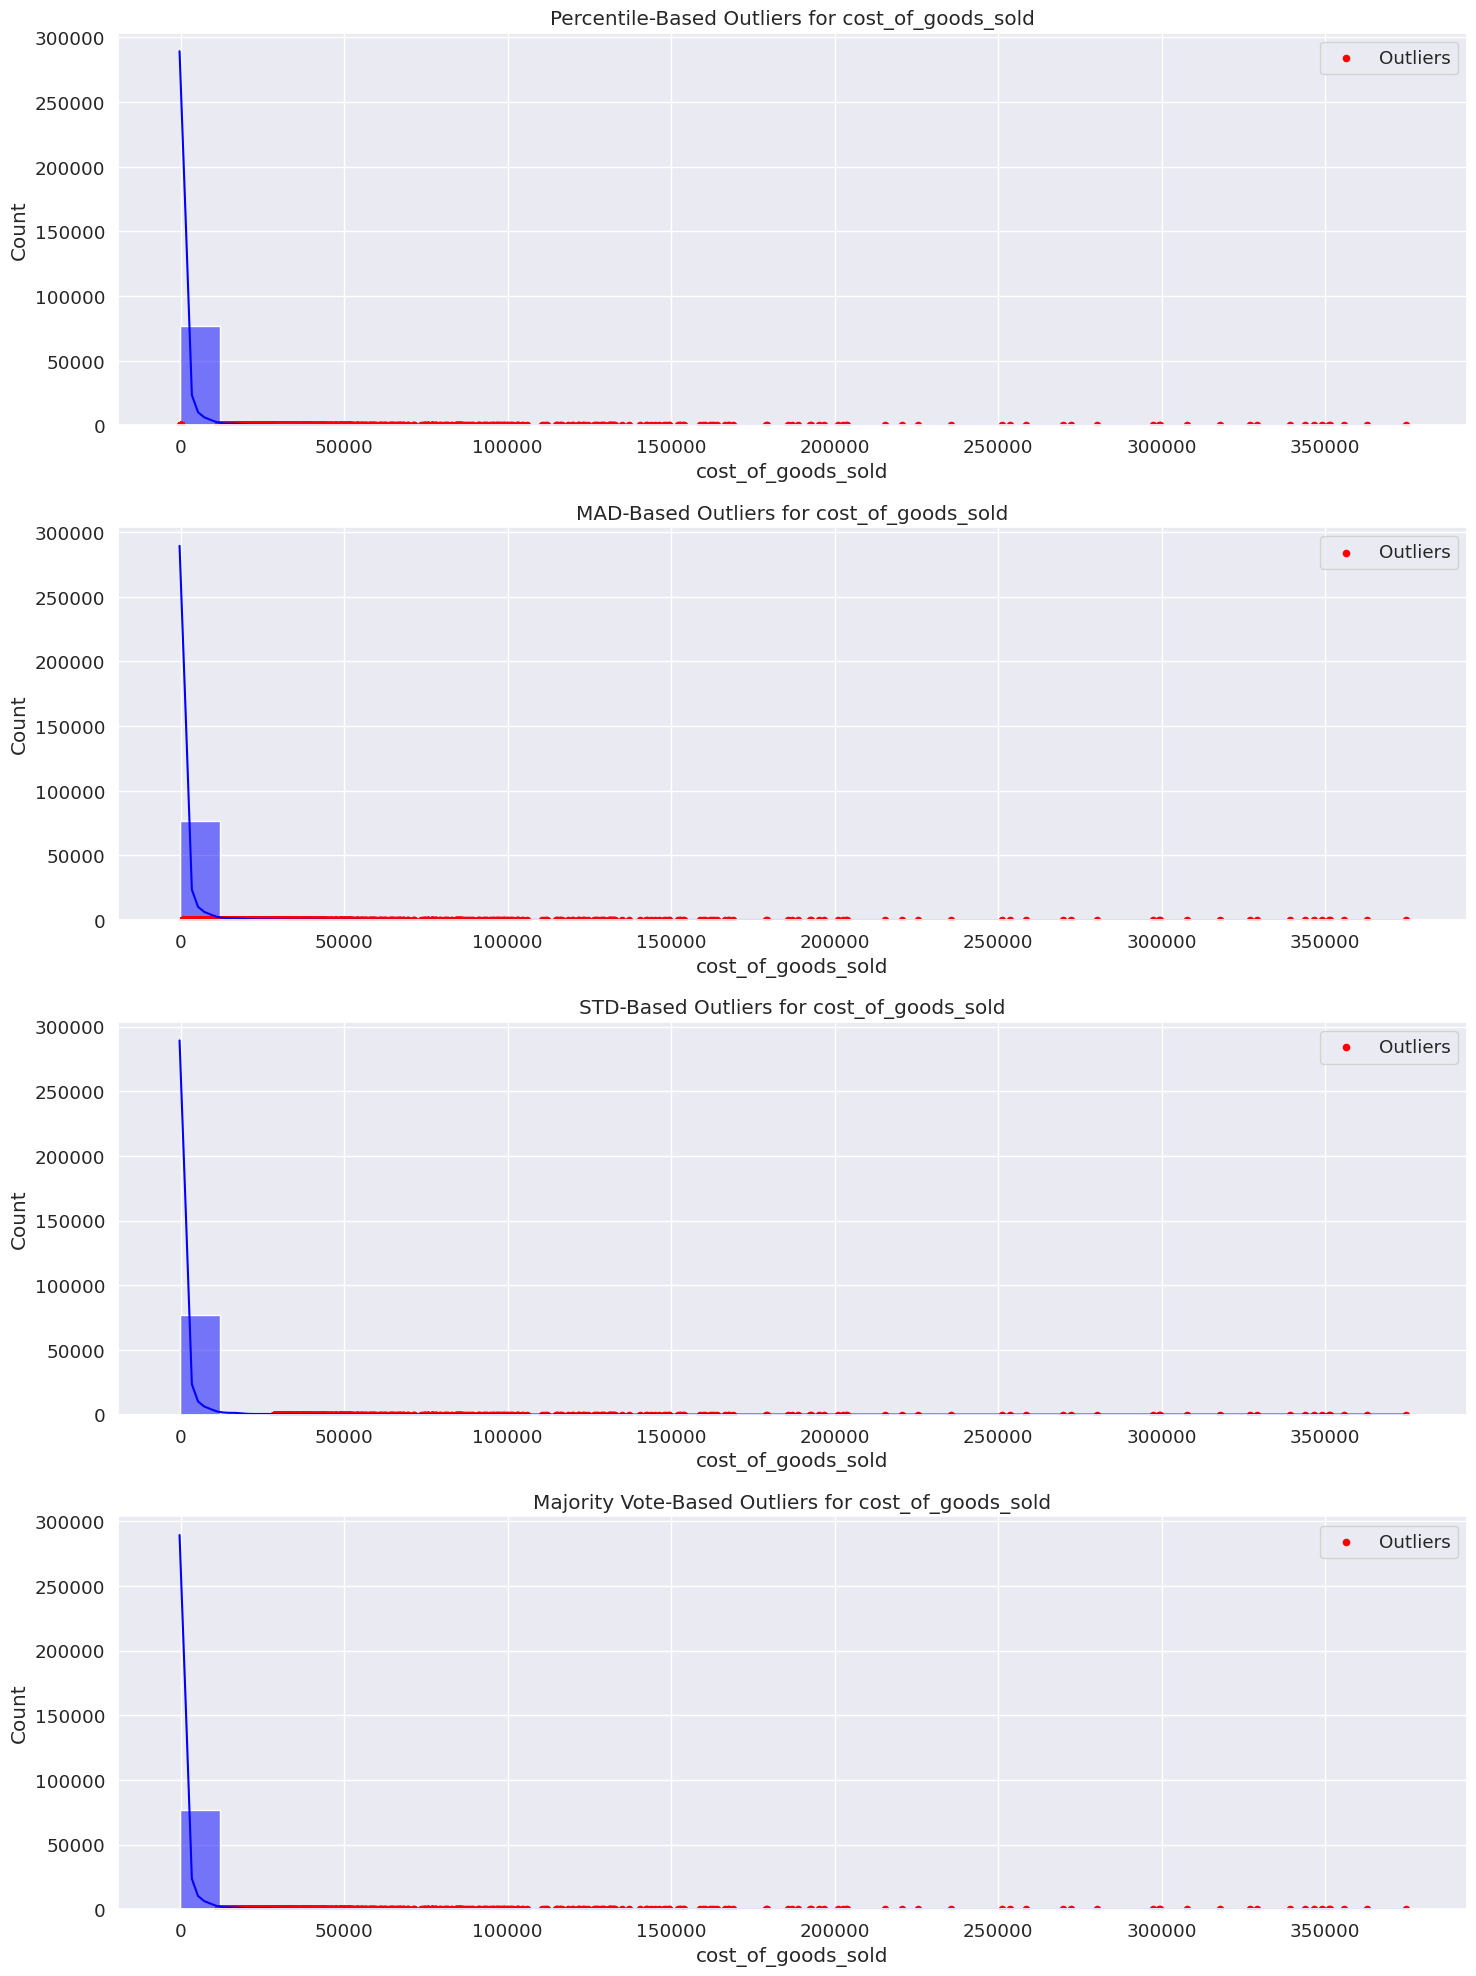

Processing Outliers for Feature: depreciation_amortization


<Figure size 1500x1000 with 0 Axes>

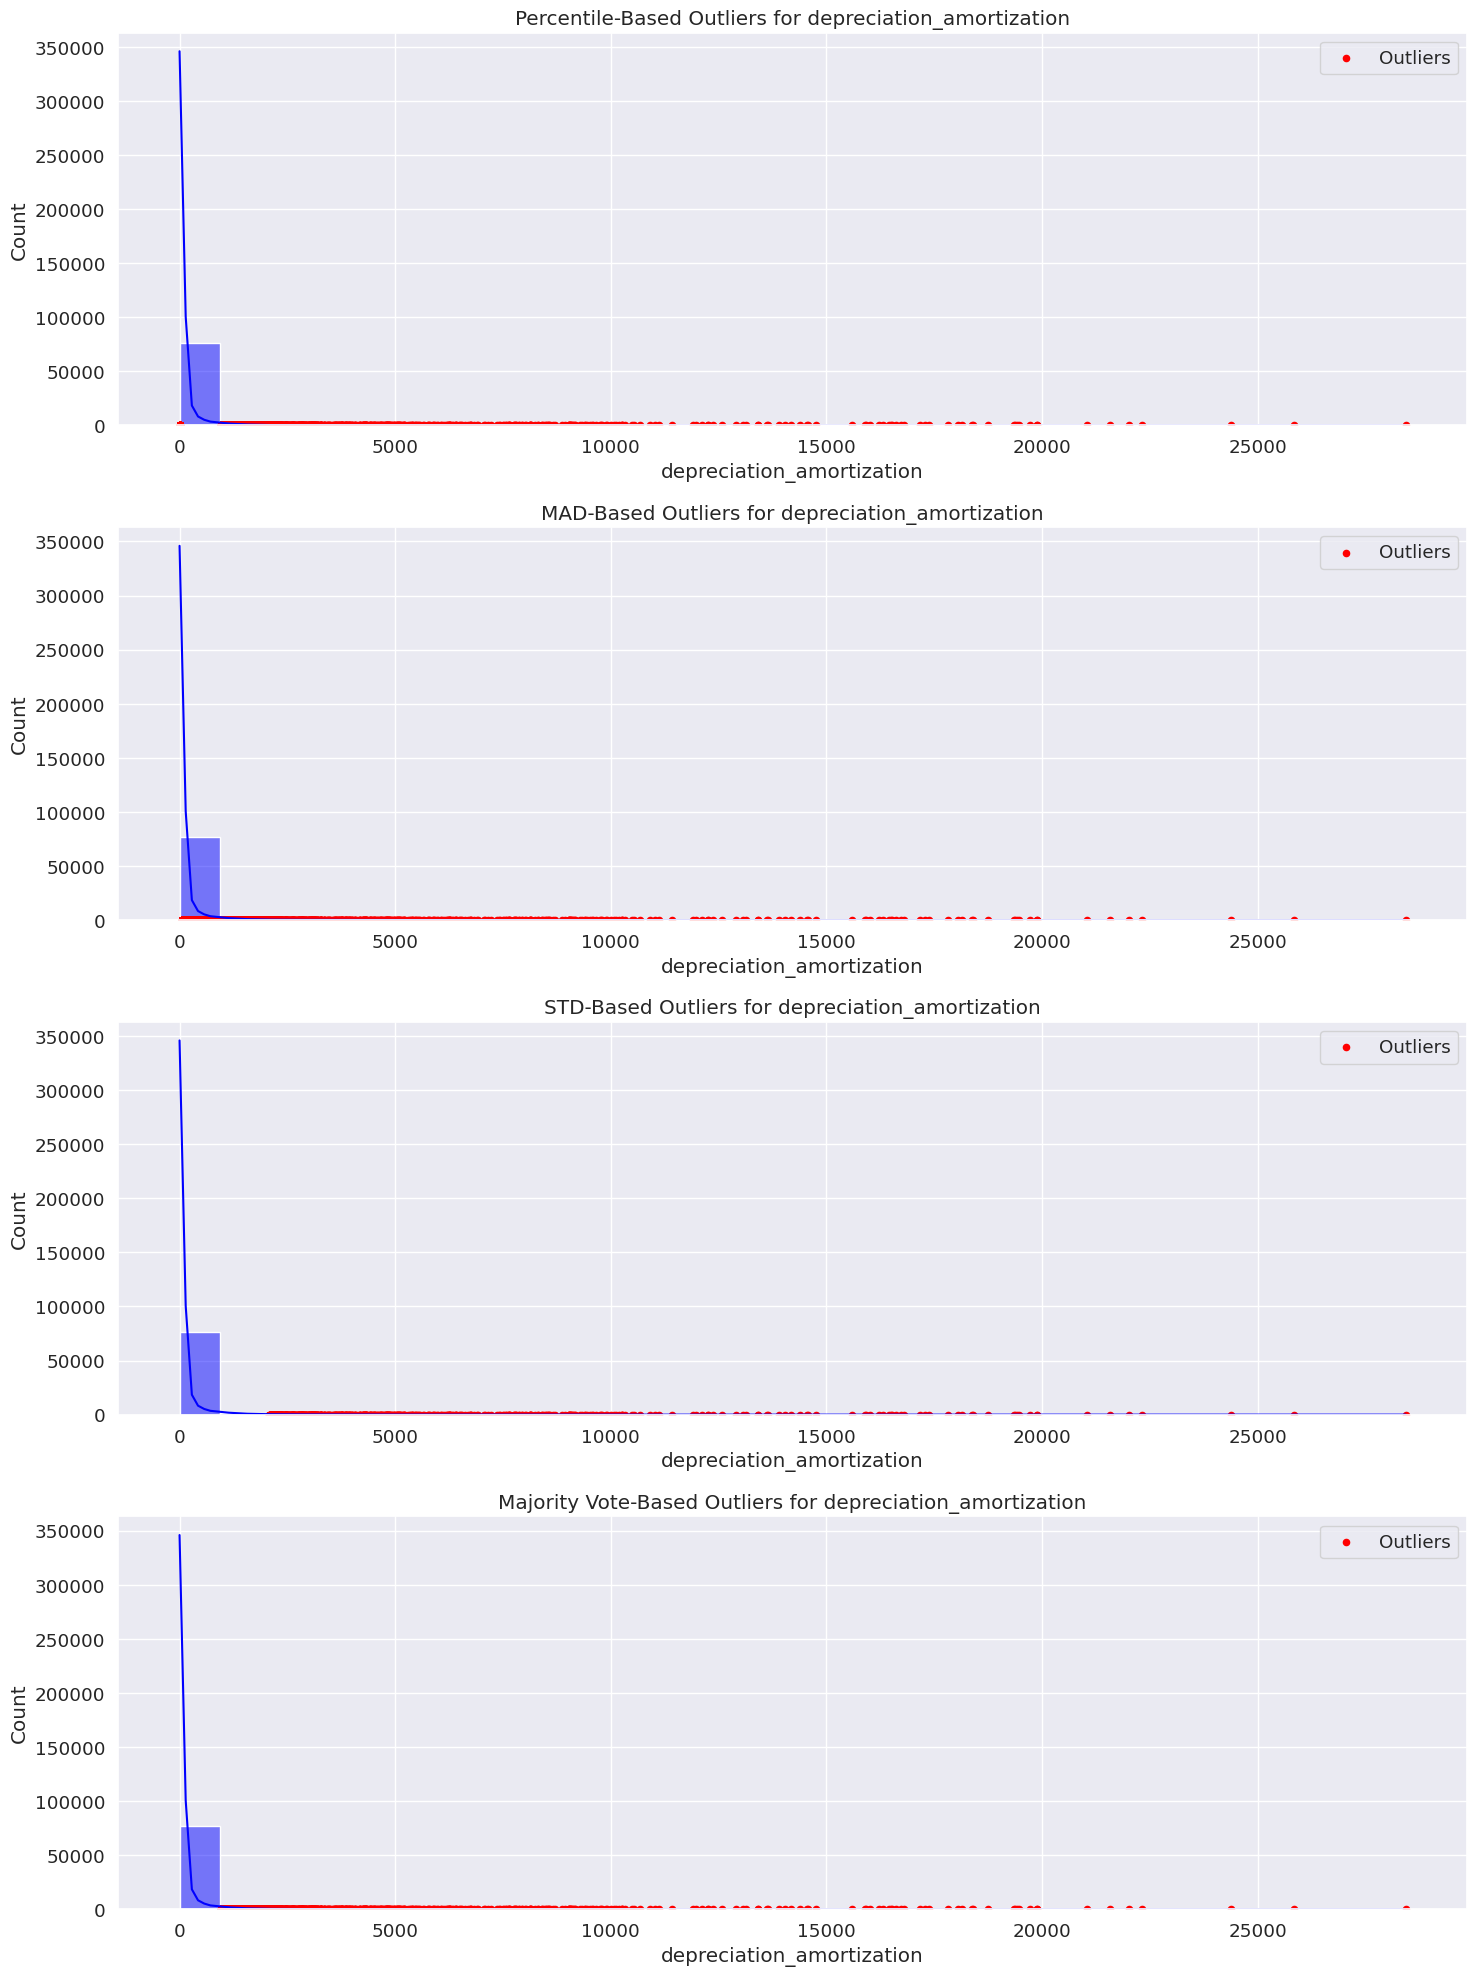

Processing Outliers for Feature: ebitda


<Figure size 1500x1000 with 0 Axes>

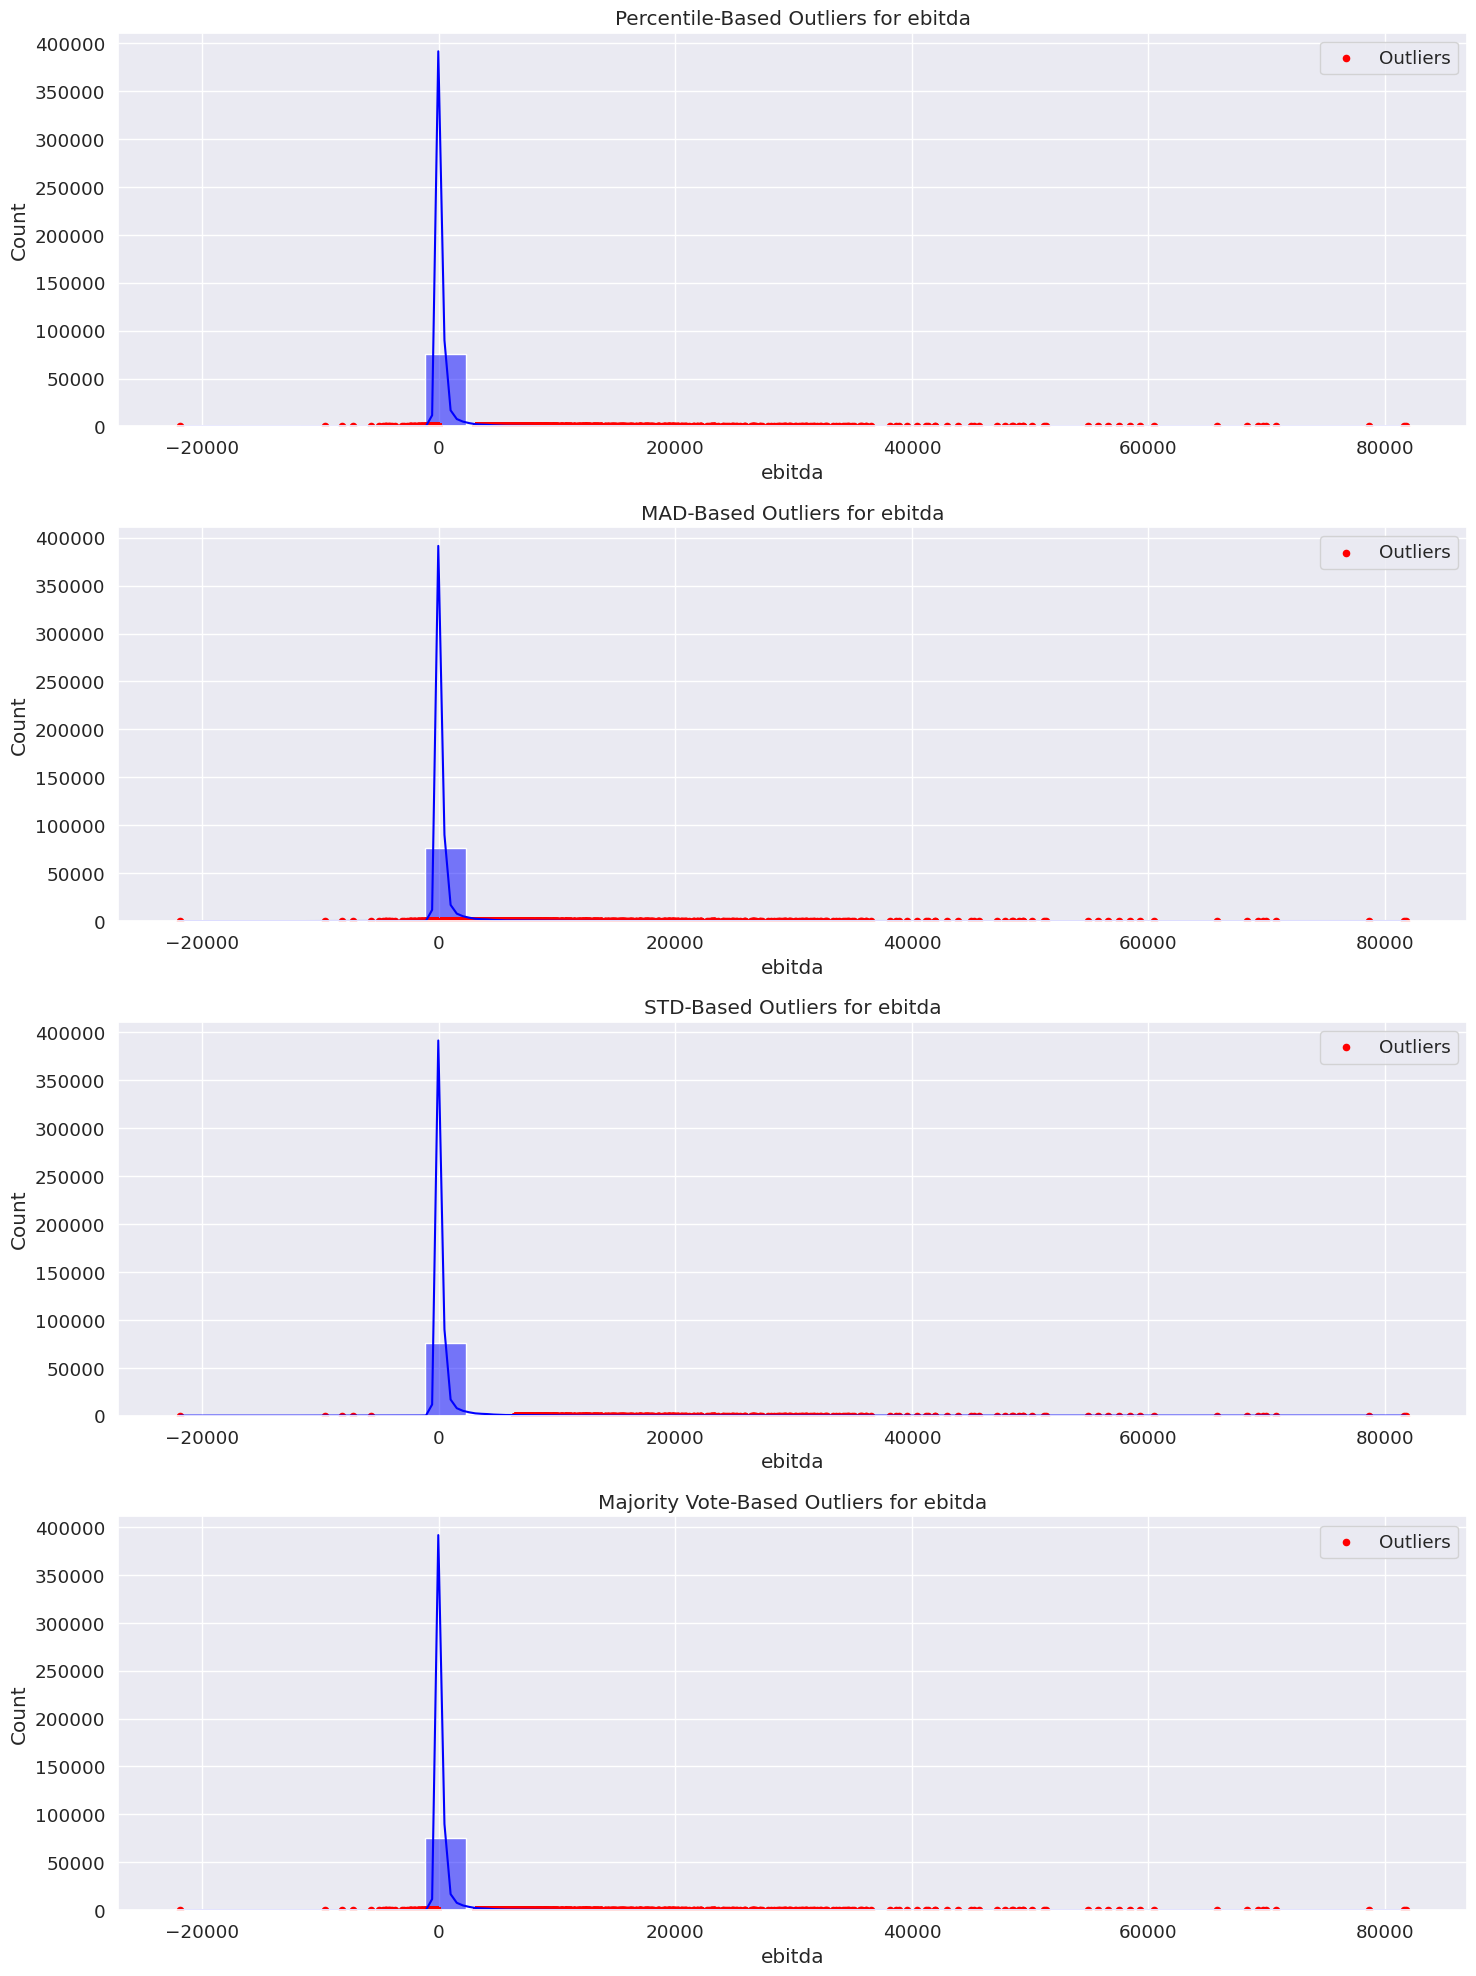

Processing Outliers for Feature: inventory


<Figure size 1500x1000 with 0 Axes>

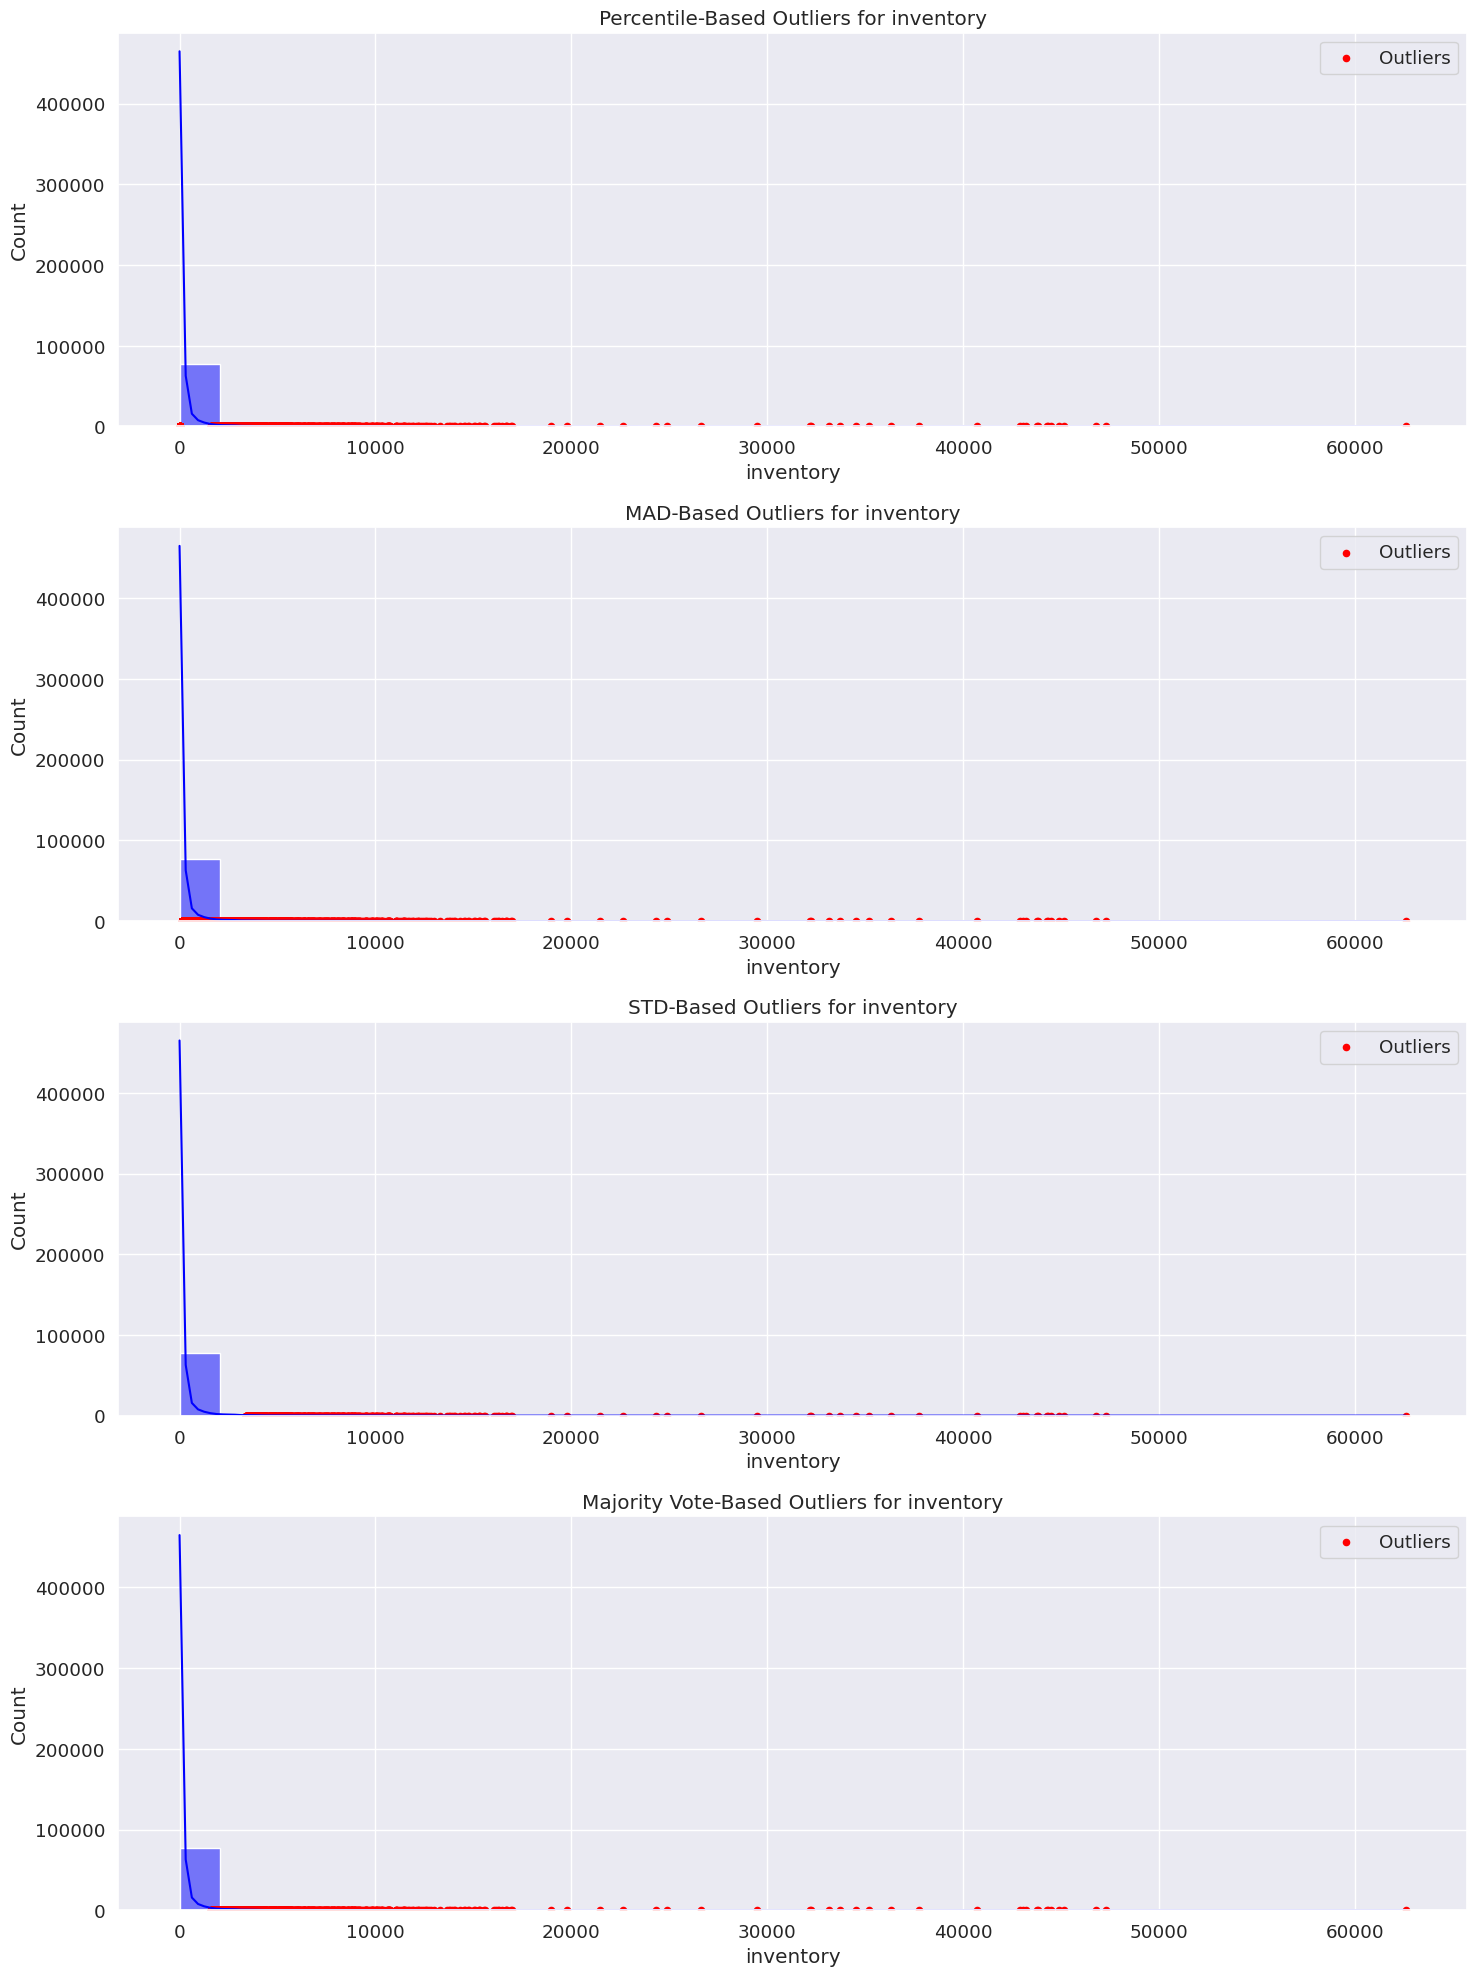

Processing Outliers for Feature: net_income


<Figure size 1500x1000 with 0 Axes>

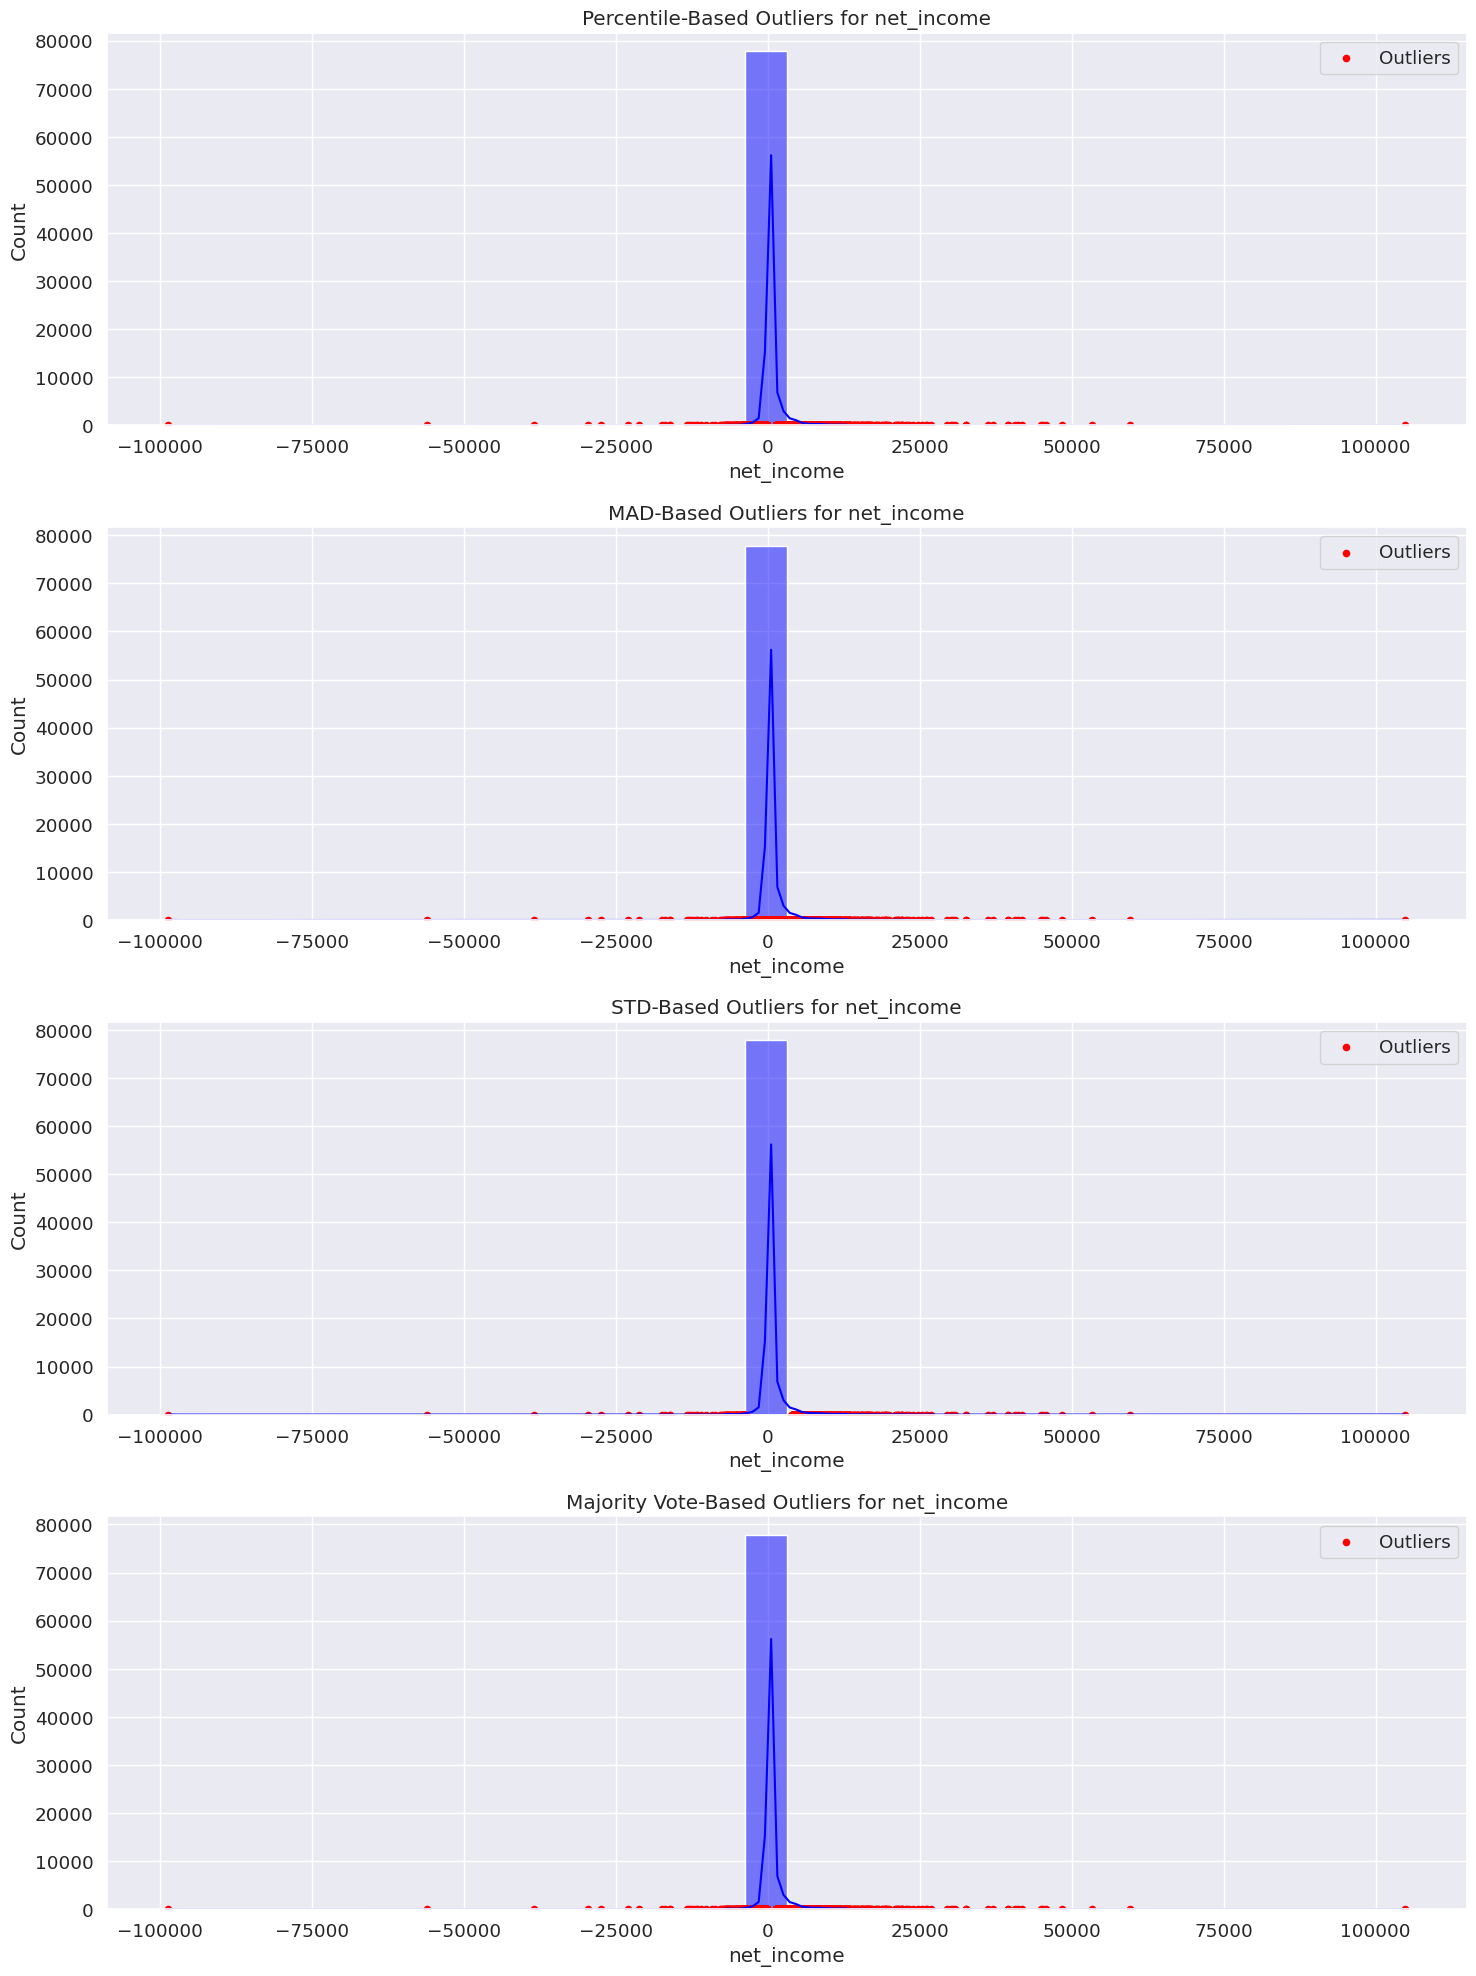

Processing Outliers for Feature: total_receivables


<Figure size 1500x1000 with 0 Axes>

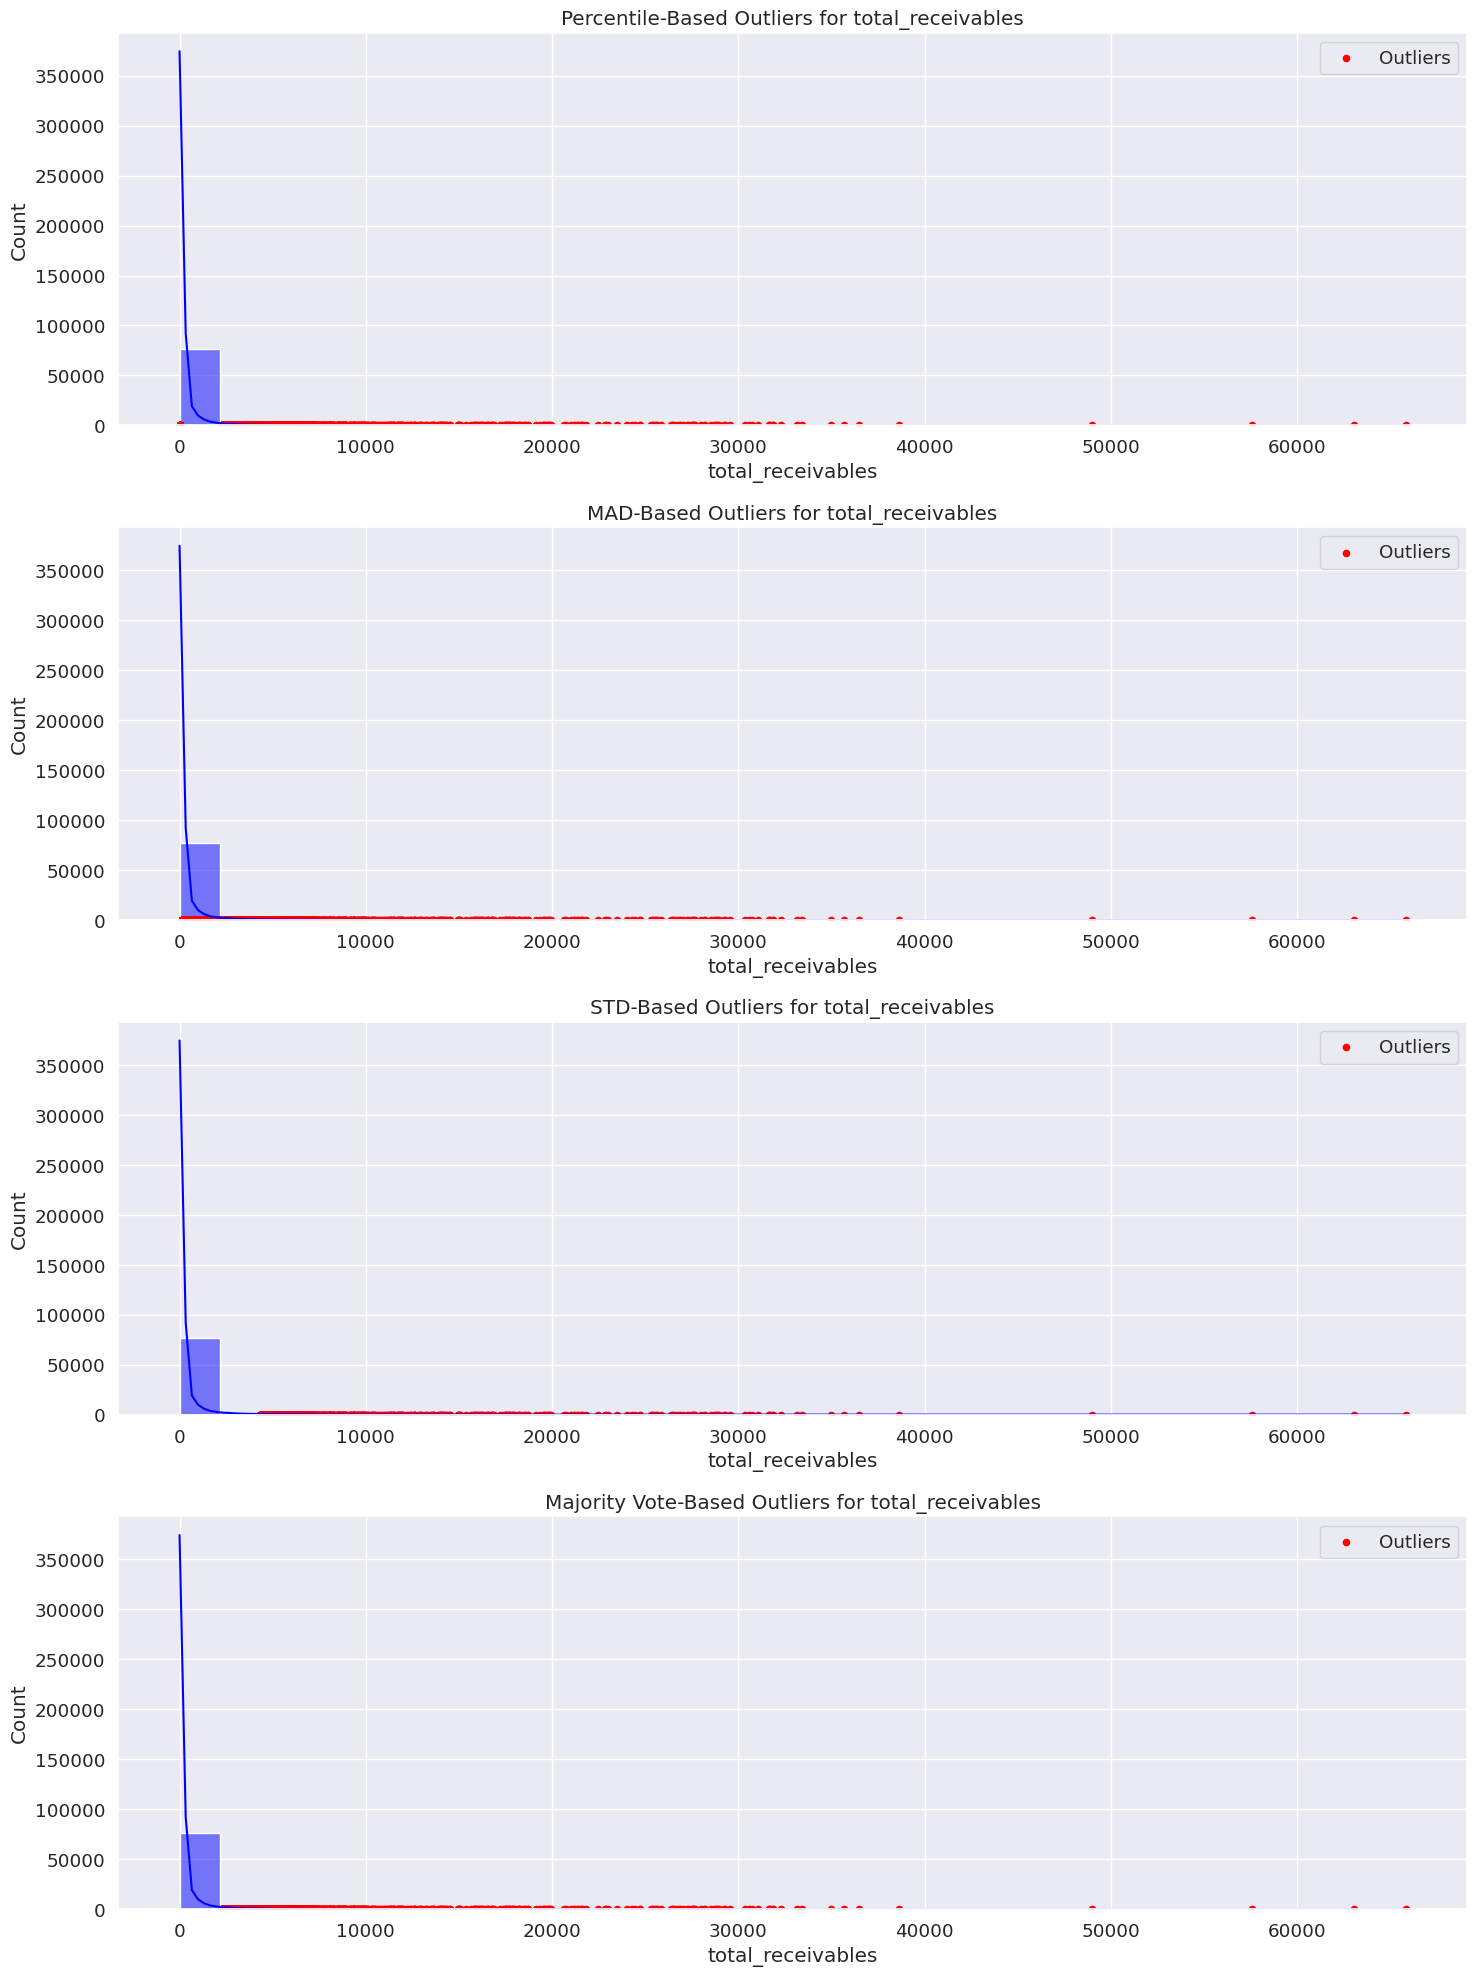

Processing Outliers for Feature: market_value


<Figure size 1500x1000 with 0 Axes>

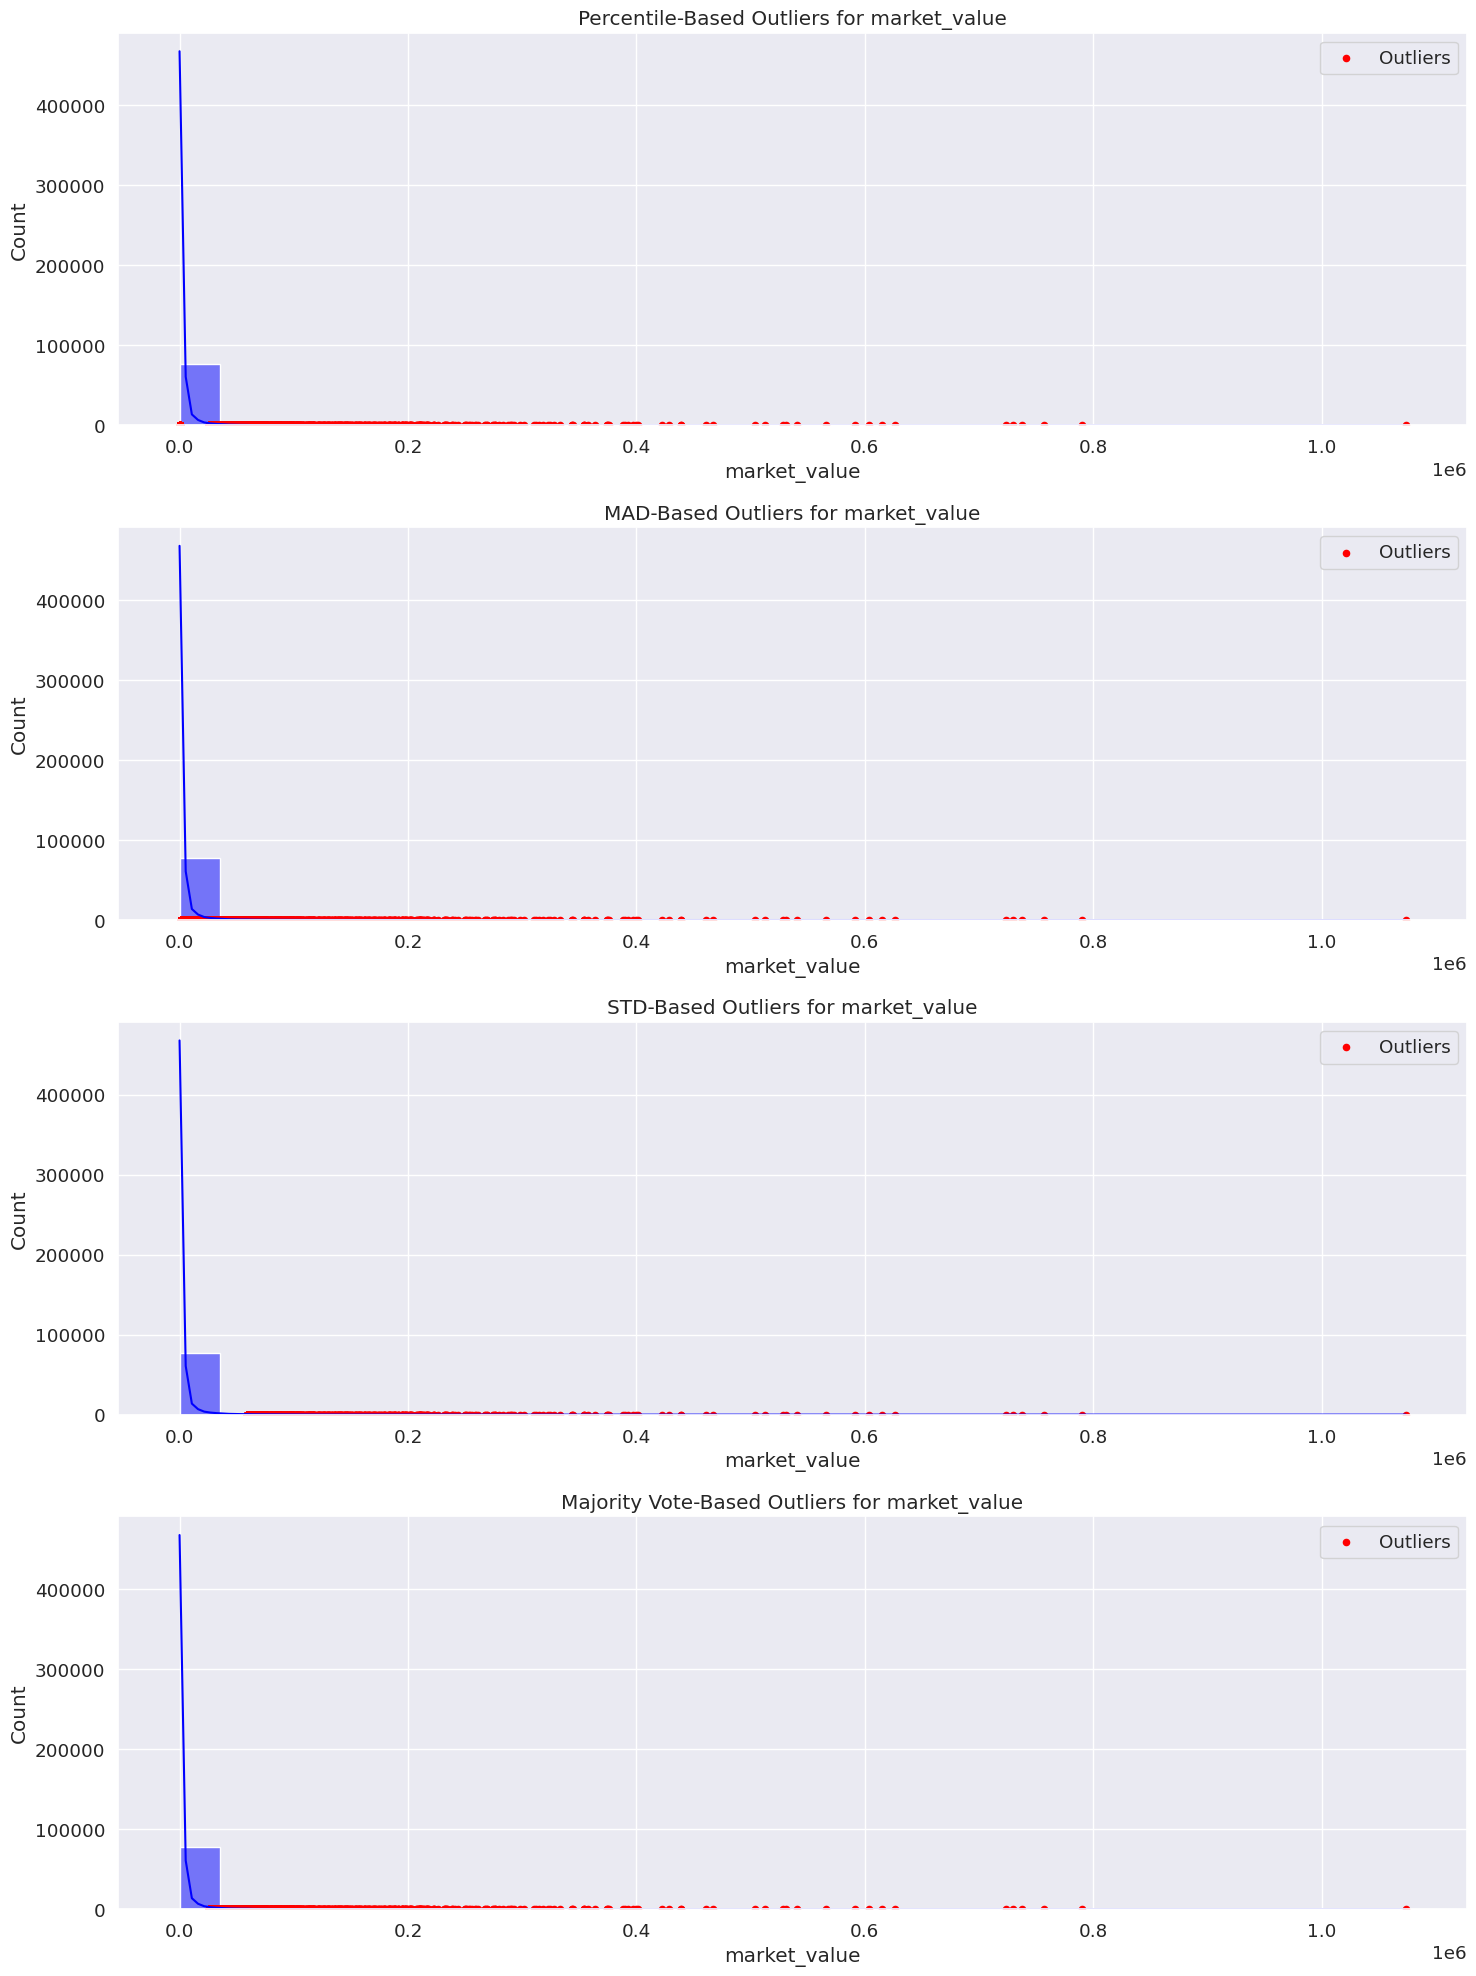

Processing Outliers for Feature: net_sales


<Figure size 1500x1000 with 0 Axes>

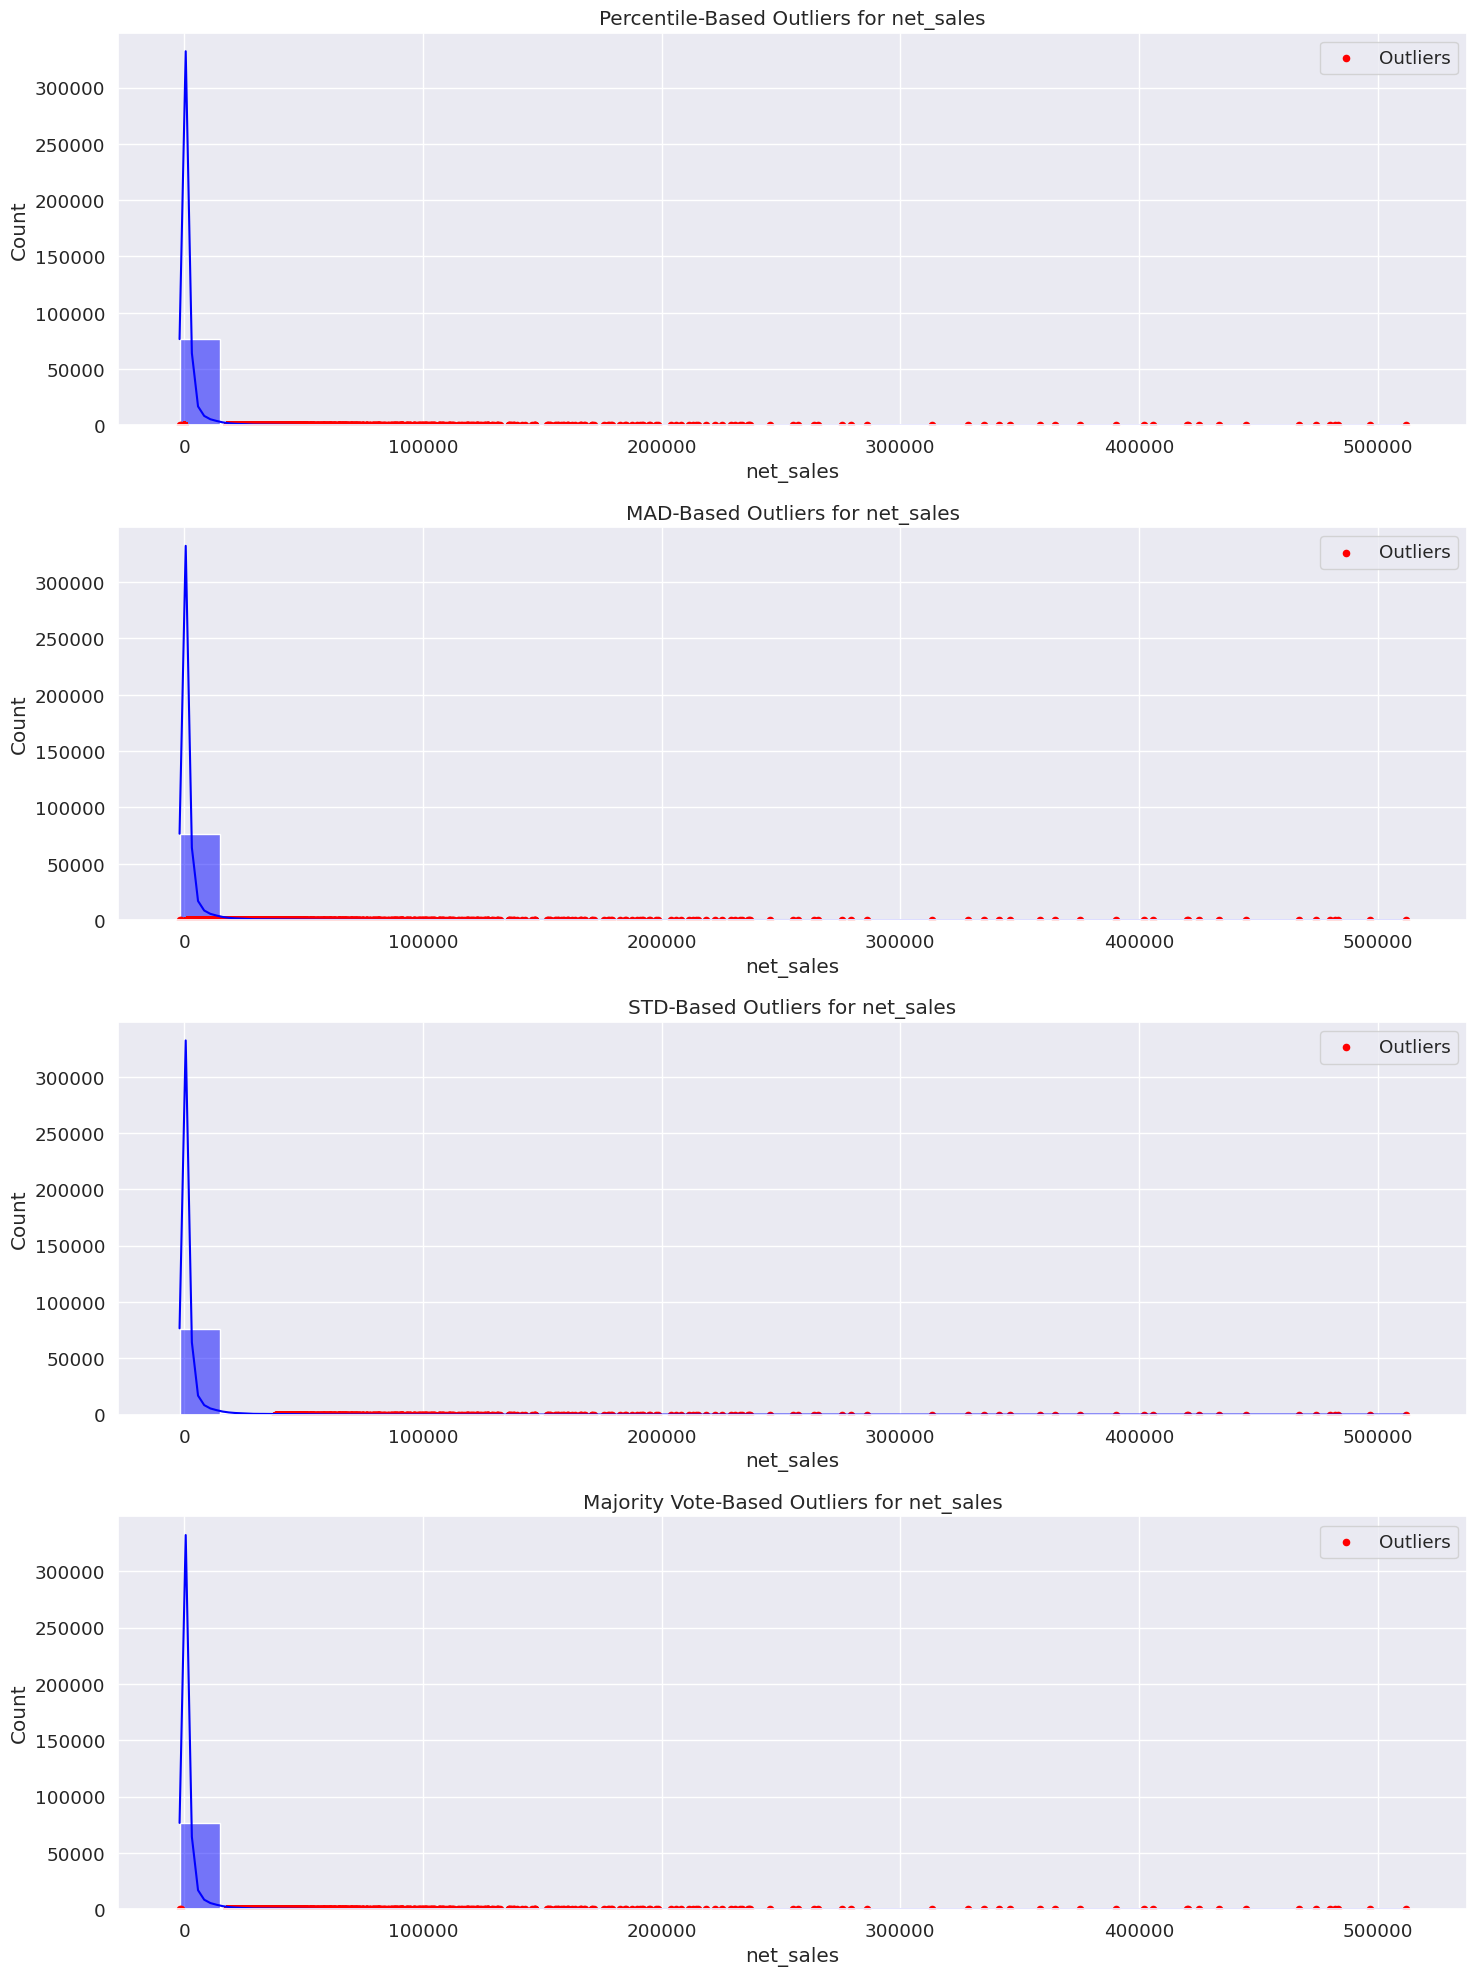

Processing Outliers for Feature: total_assets


<Figure size 1500x1000 with 0 Axes>

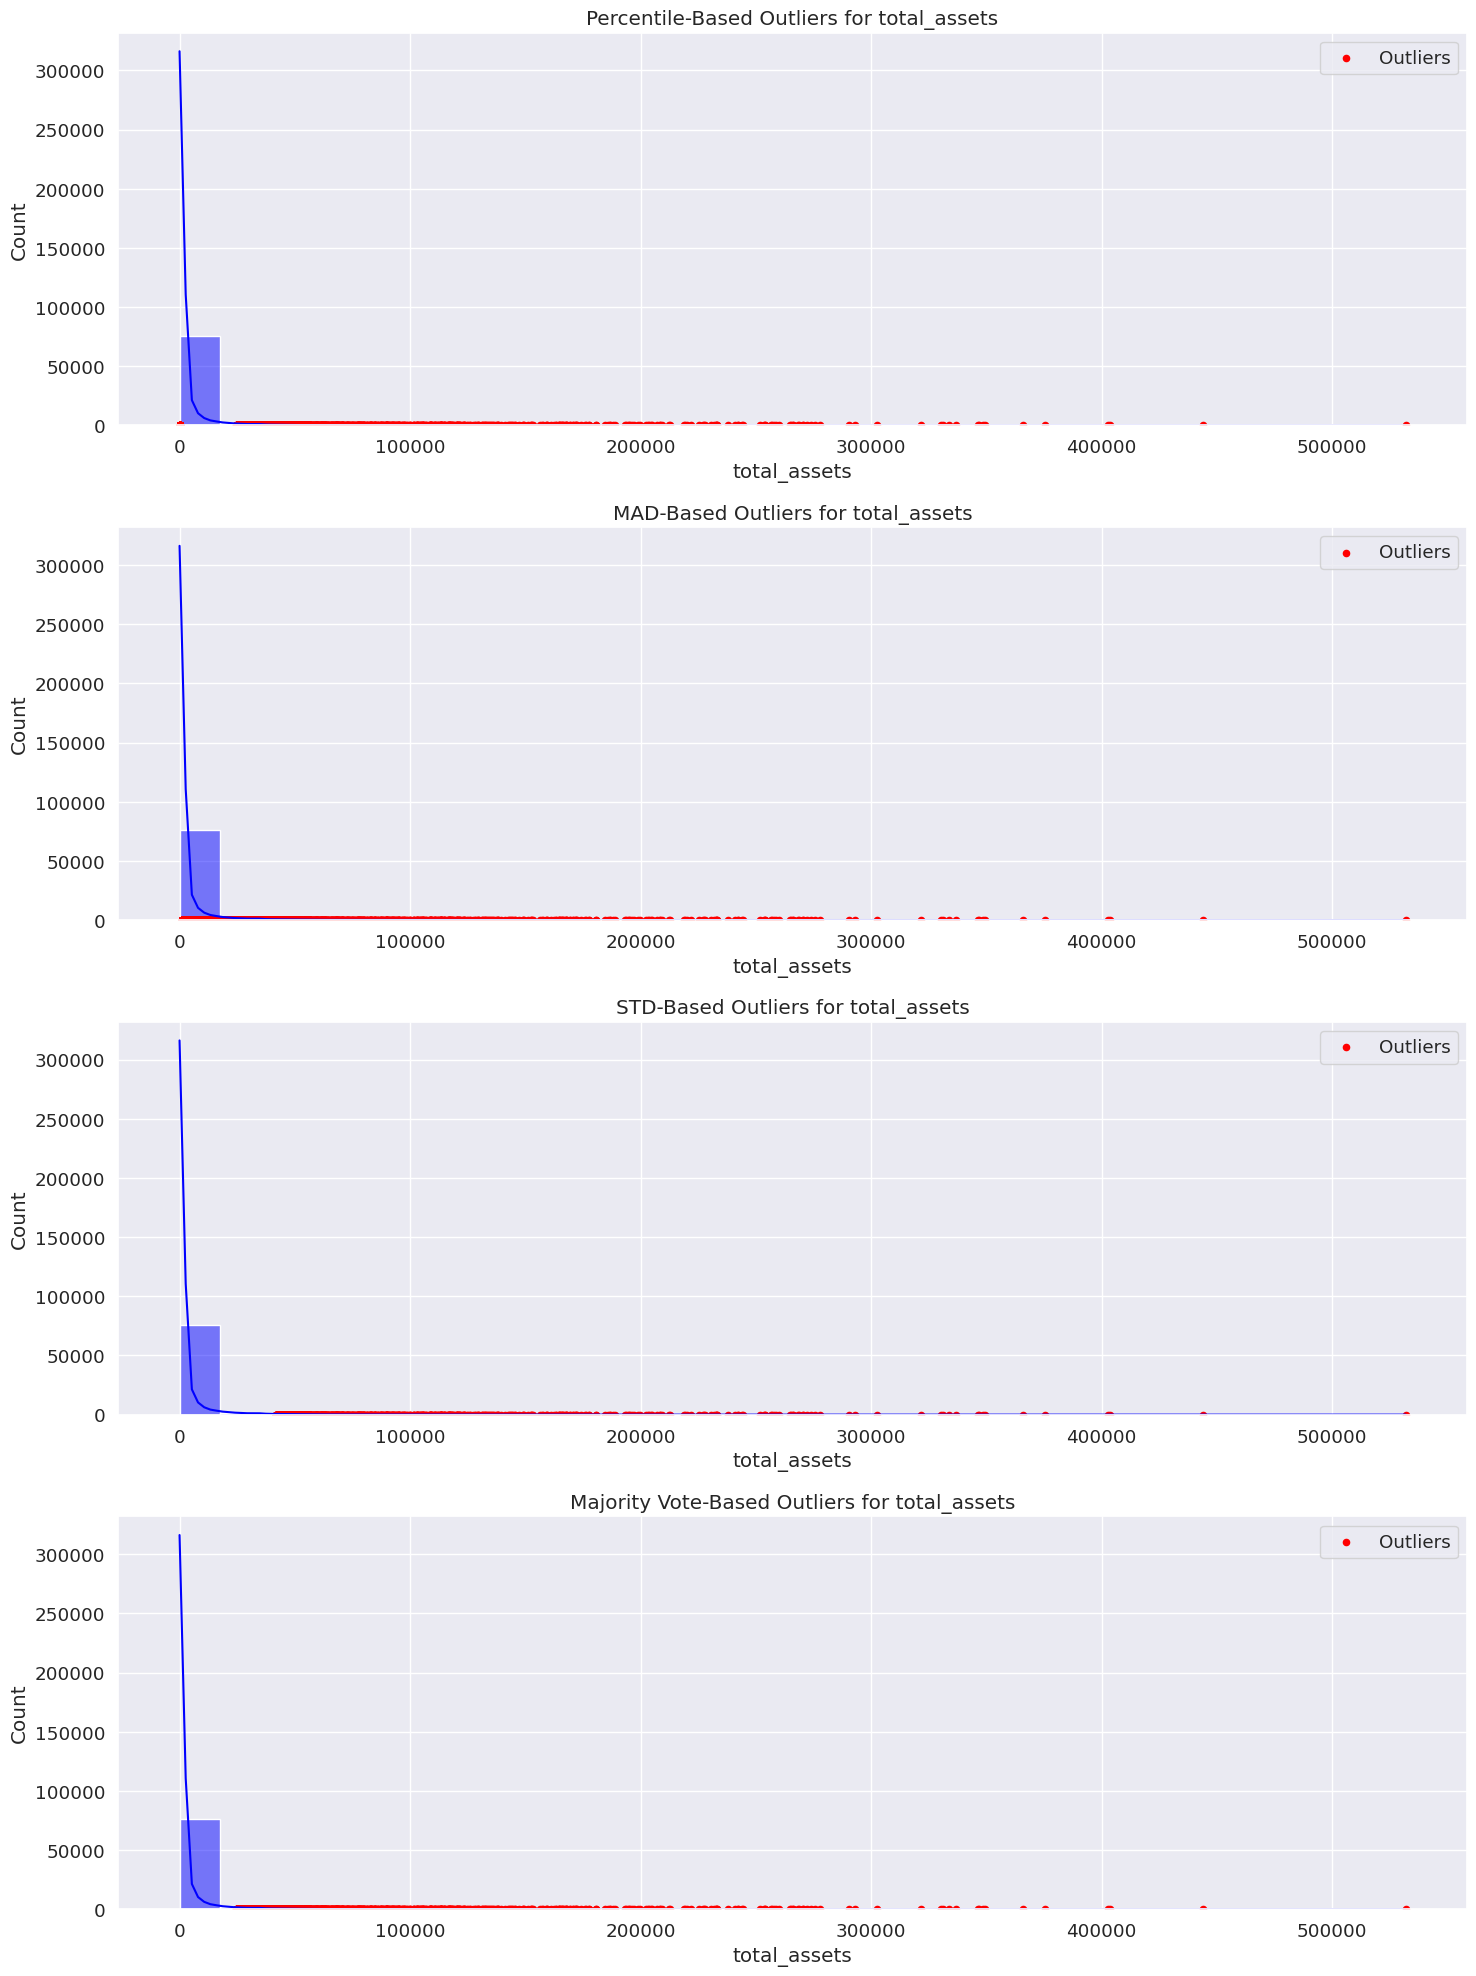

Processing Outliers for Feature: total_long_term_debt


<Figure size 1500x1000 with 0 Axes>

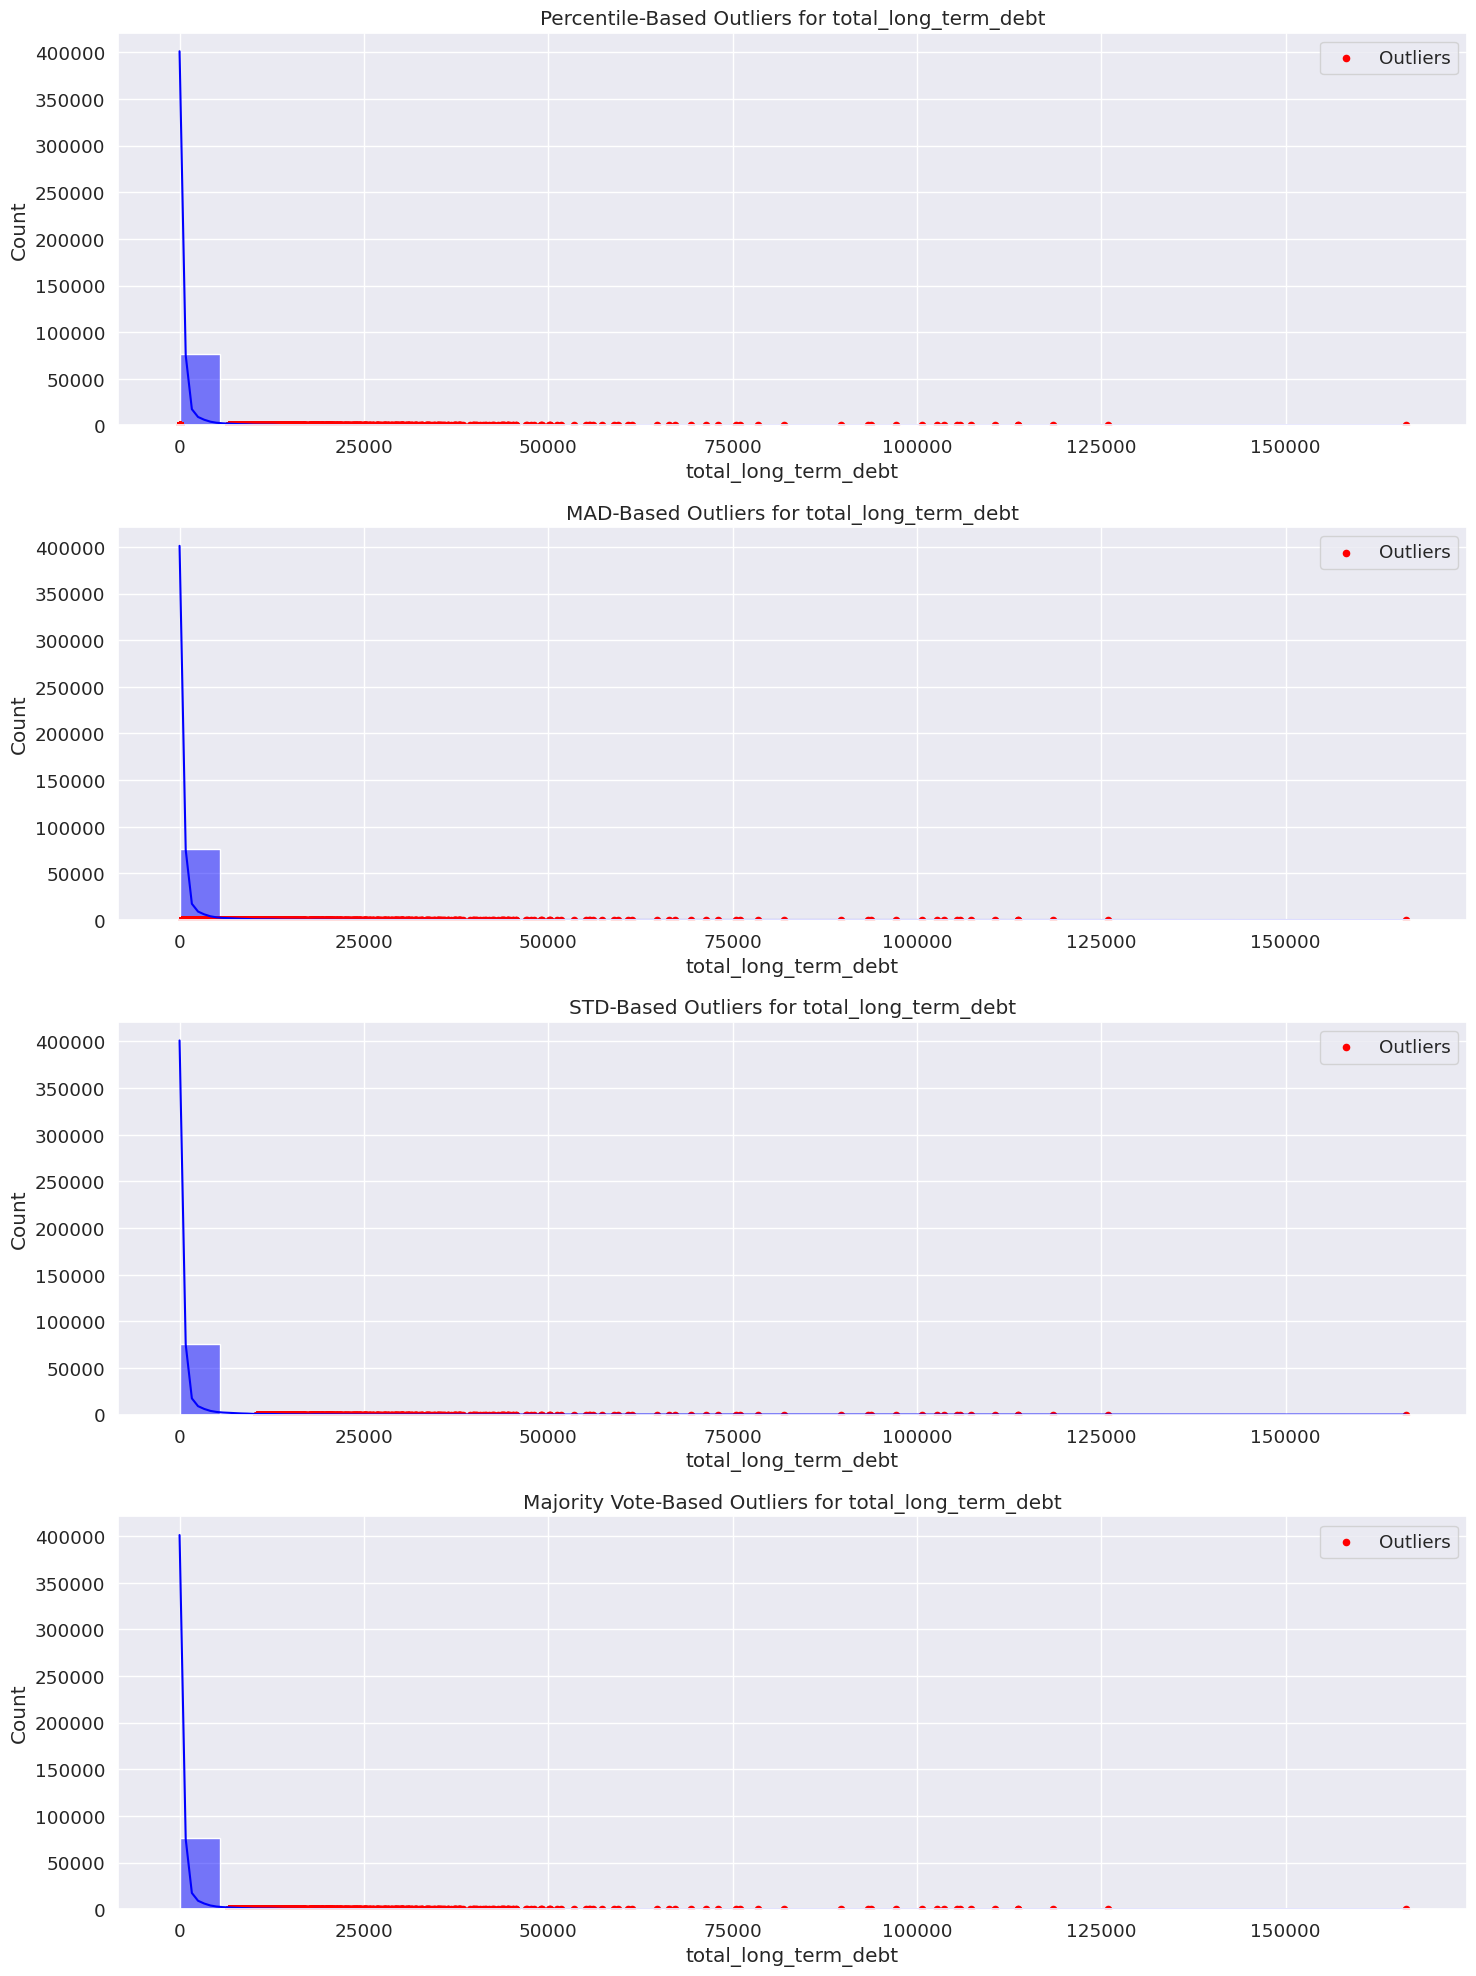

Processing Outliers for Feature: ebit


<Figure size 1500x1000 with 0 Axes>

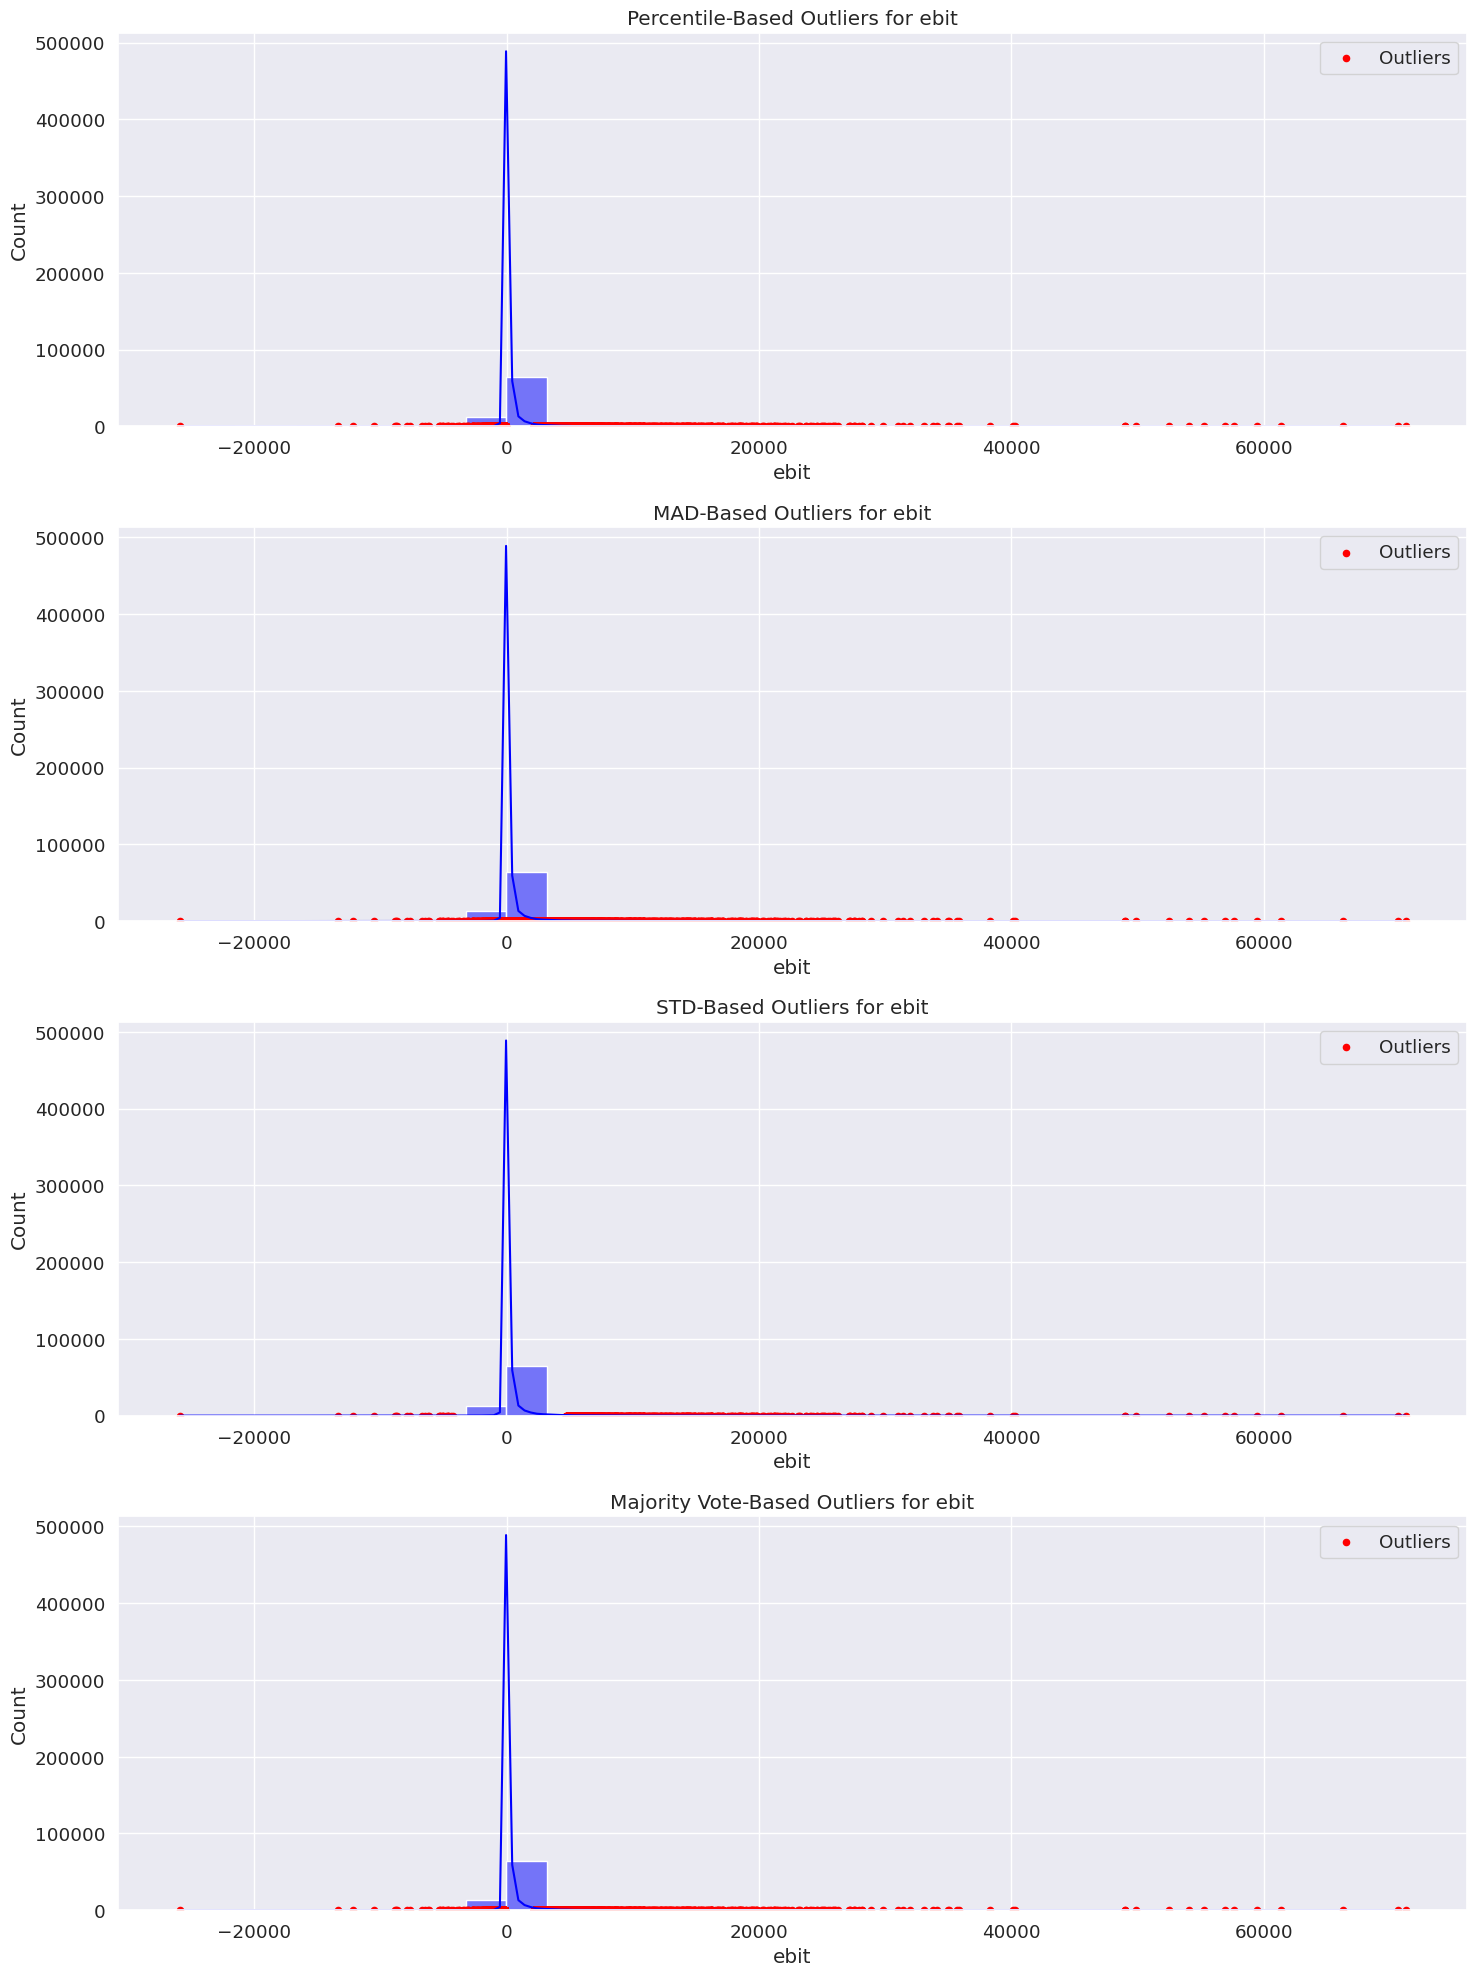

Processing Outliers for Feature: gross_profit


<Figure size 1500x1000 with 0 Axes>

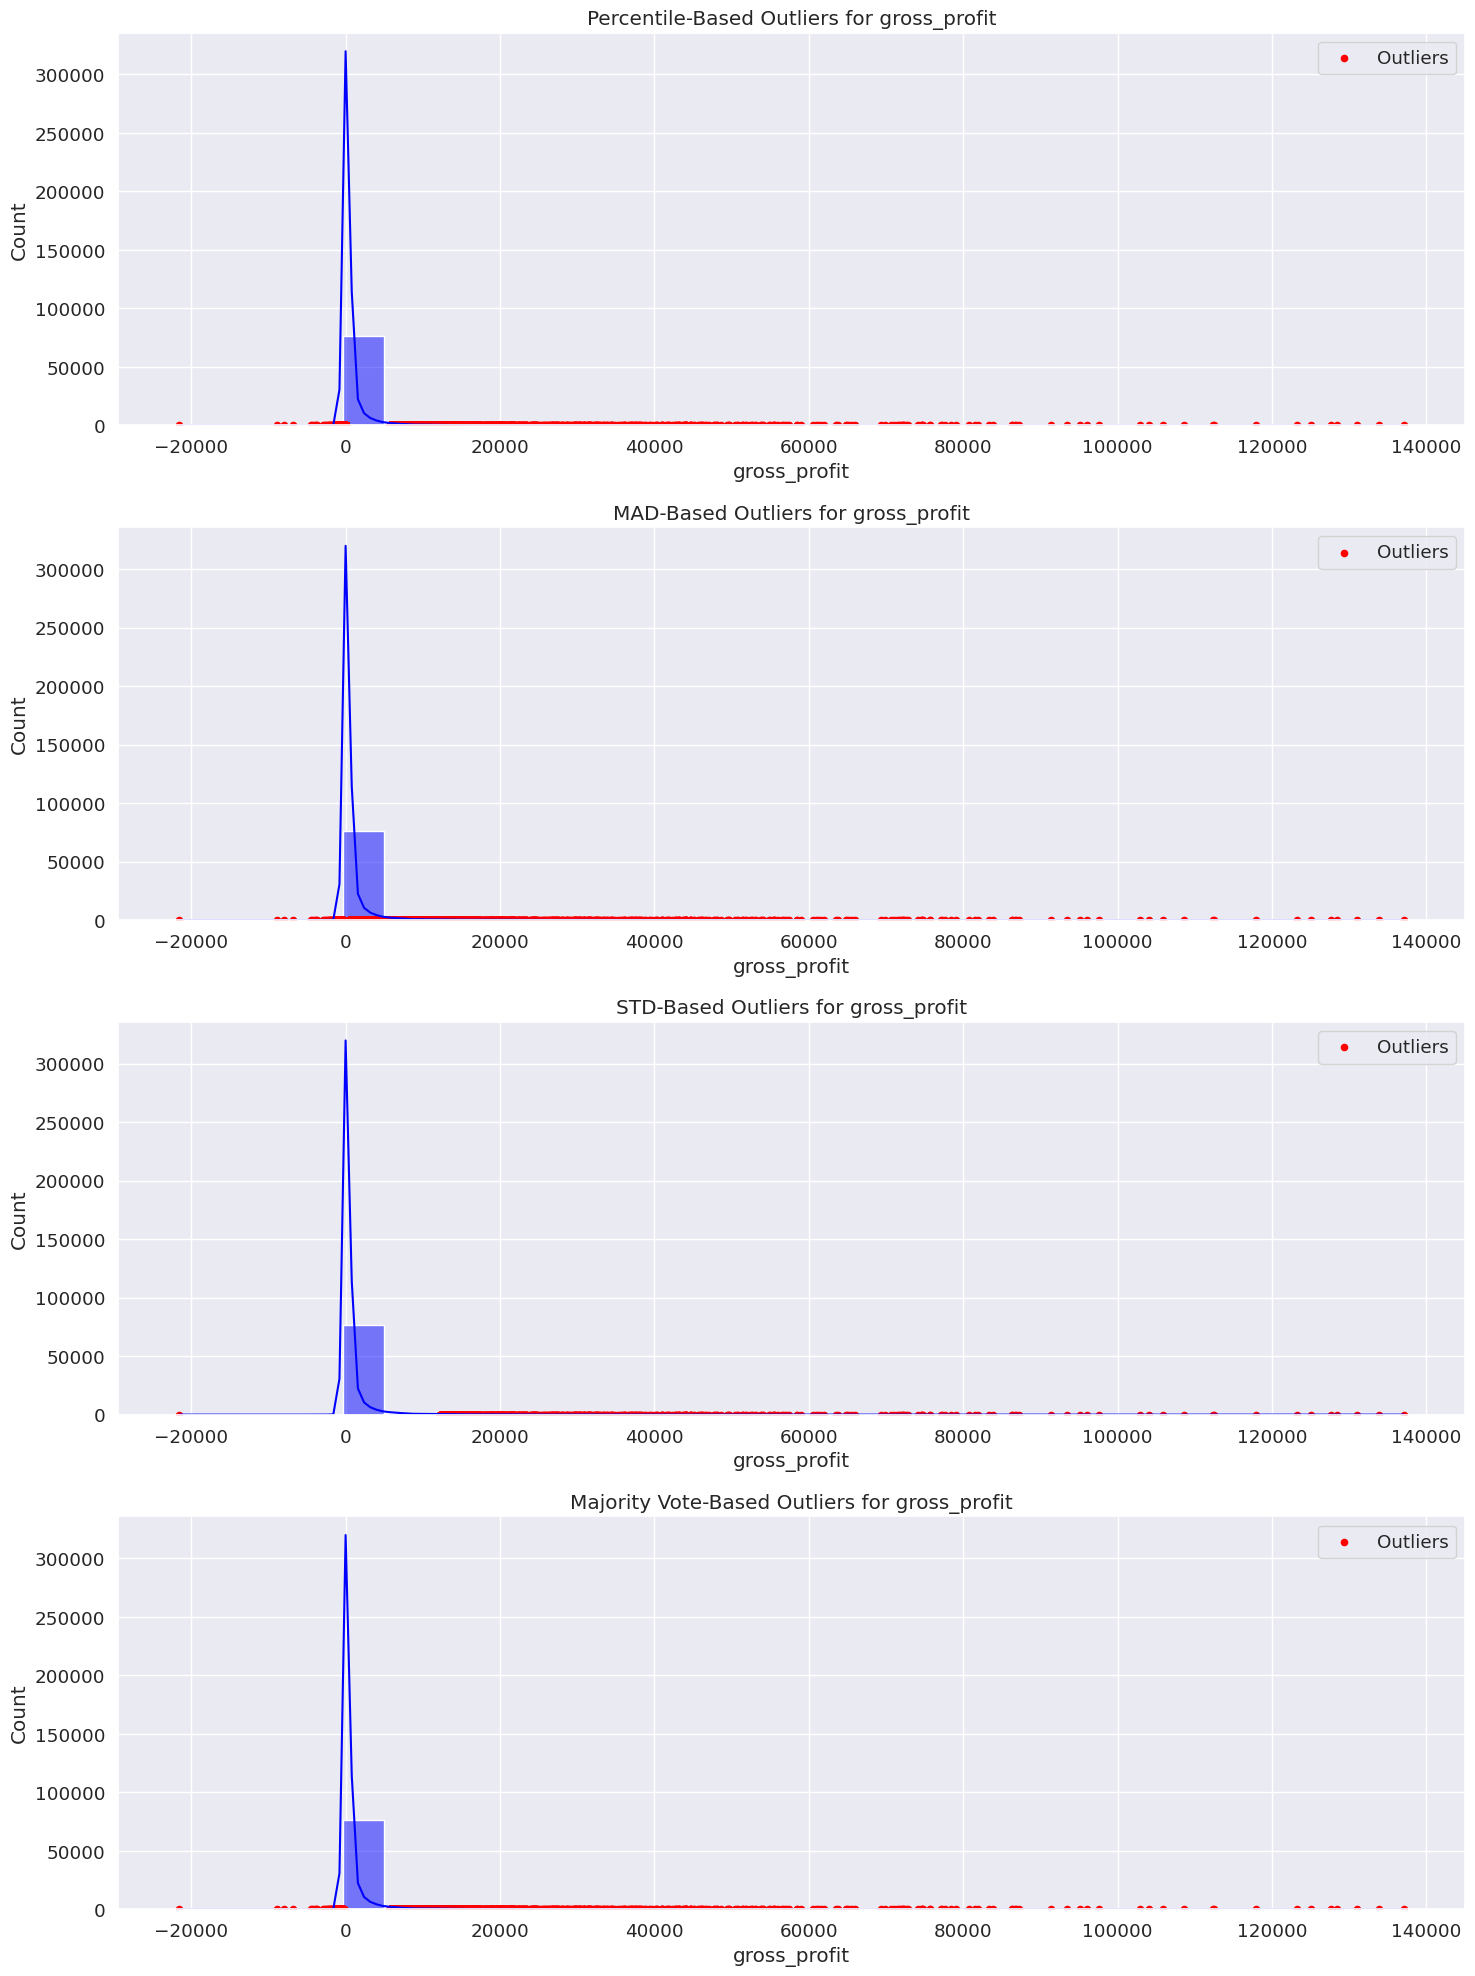

Processing Outliers for Feature: total_current_liabilities


<Figure size 1500x1000 with 0 Axes>

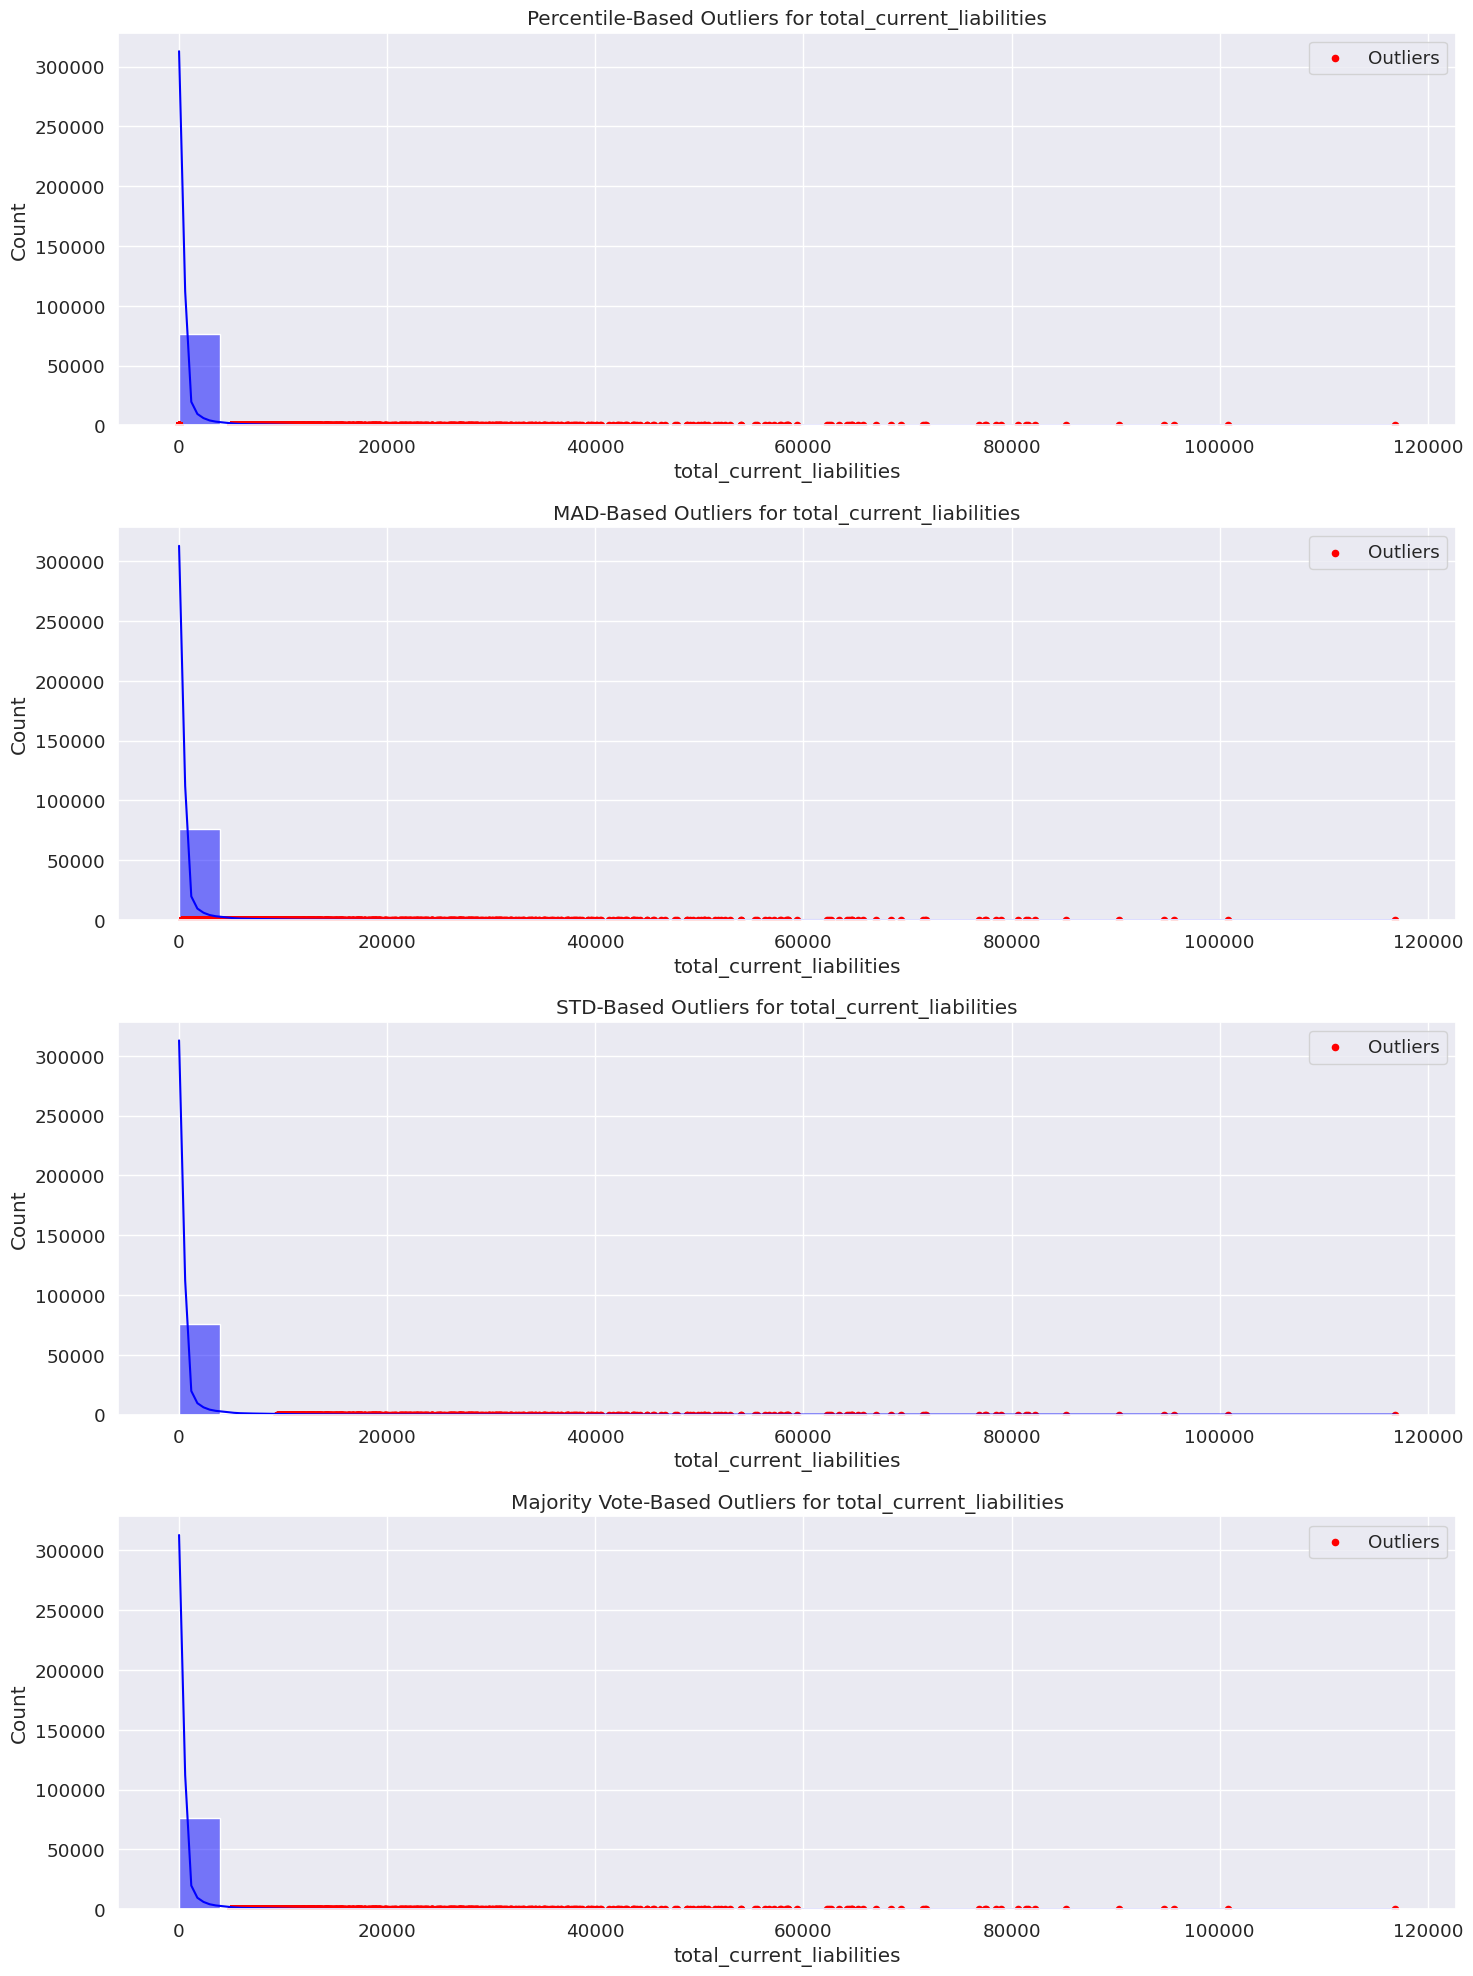

Processing Outliers for Feature: retained_earnings


<Figure size 1500x1000 with 0 Axes>

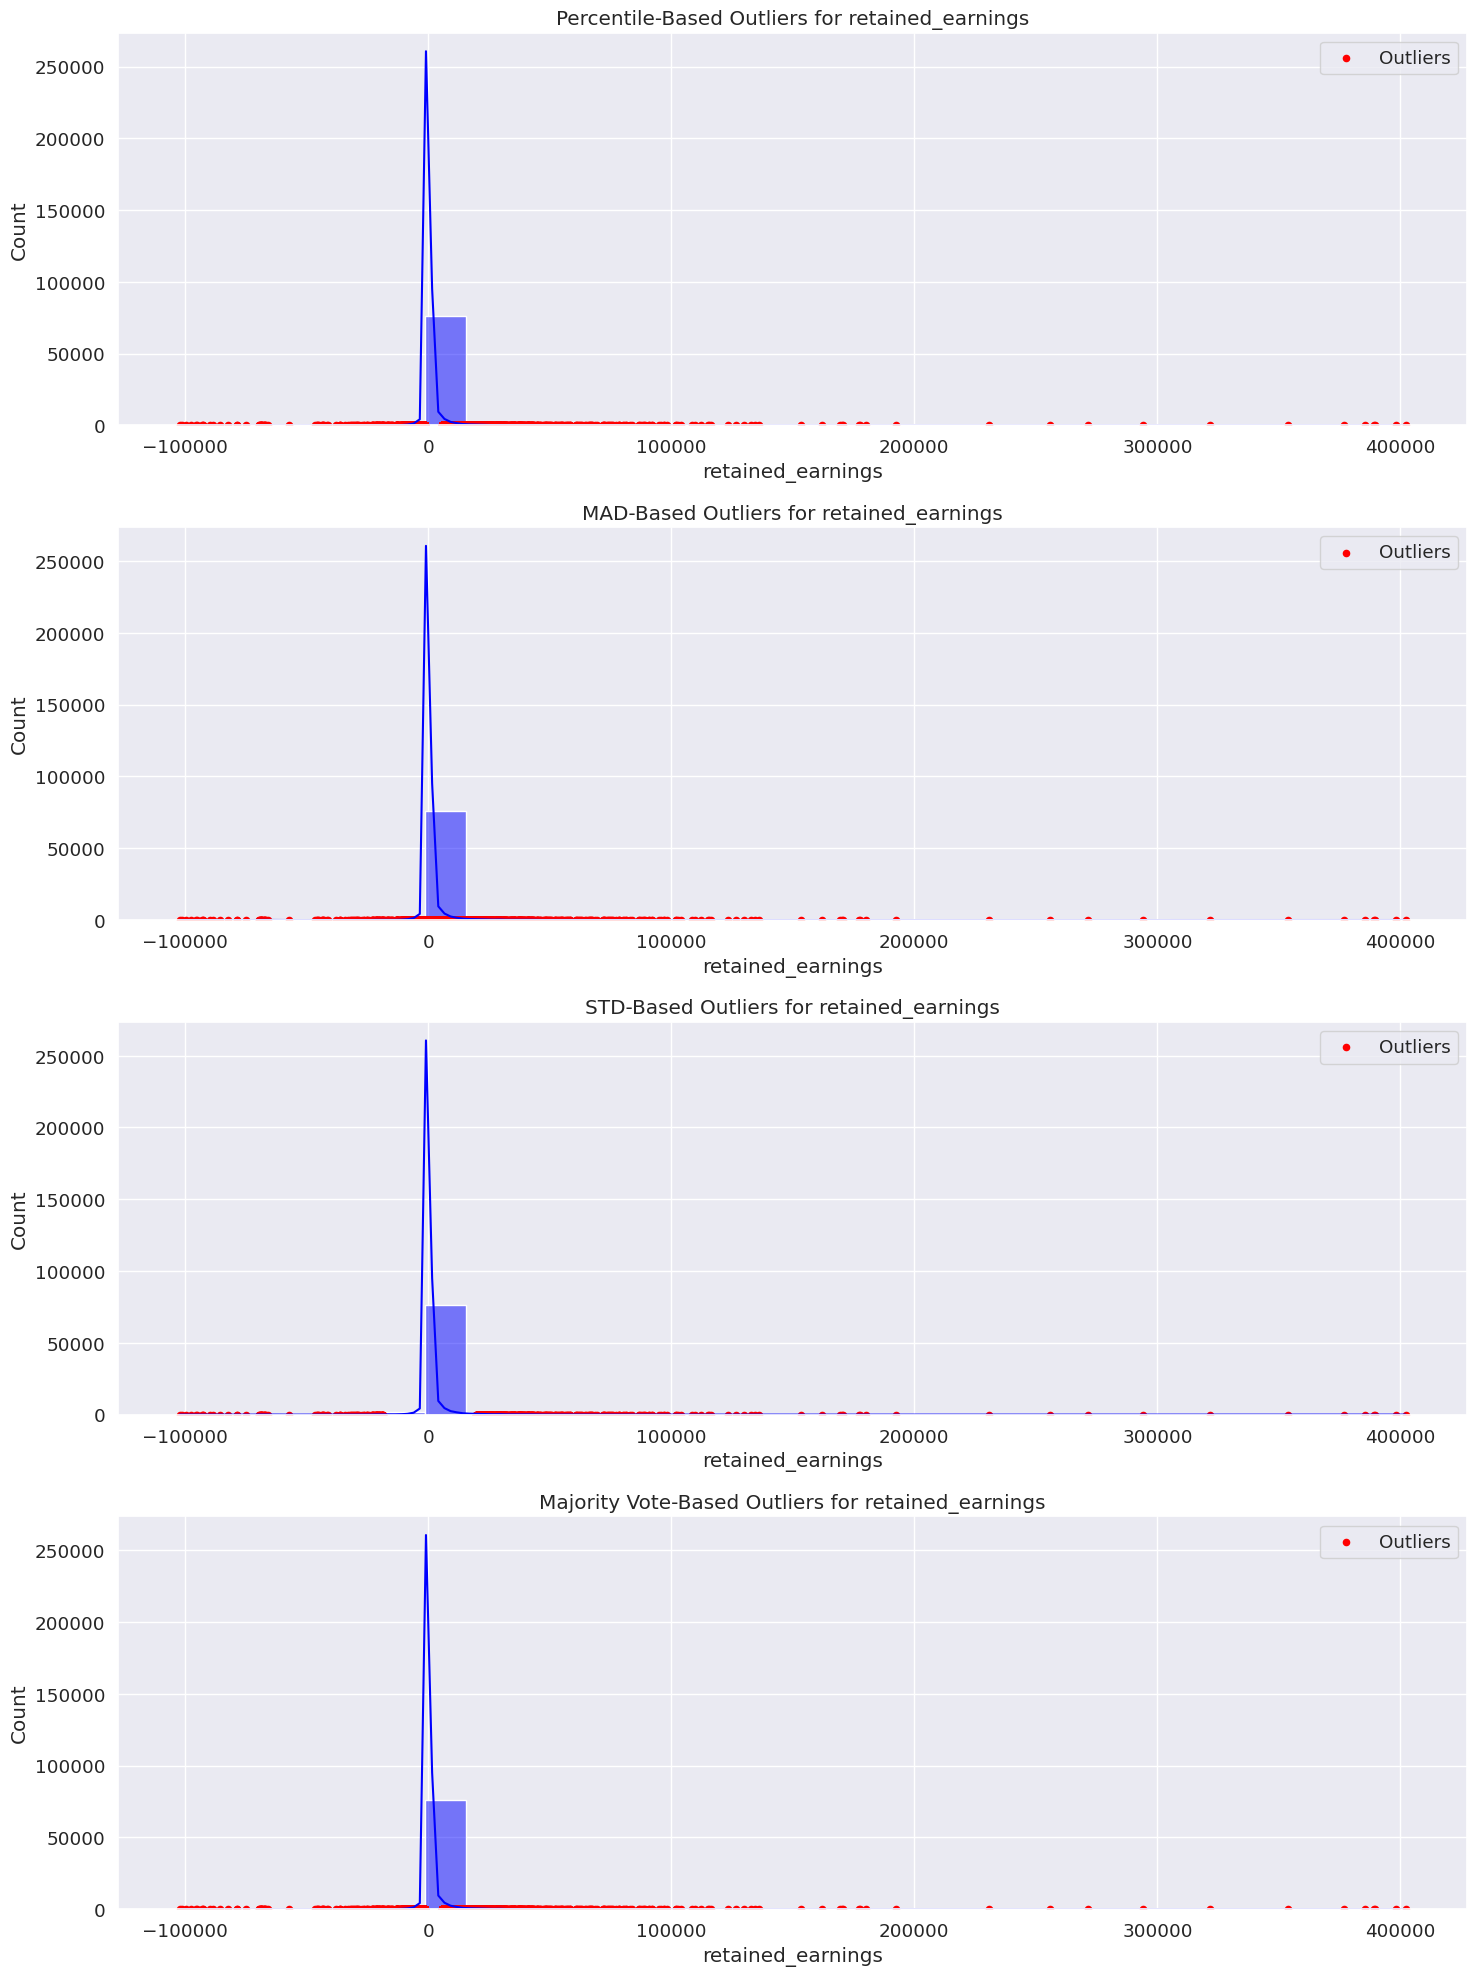

Processing Outliers for Feature: total_revenue


<Figure size 1500x1000 with 0 Axes>

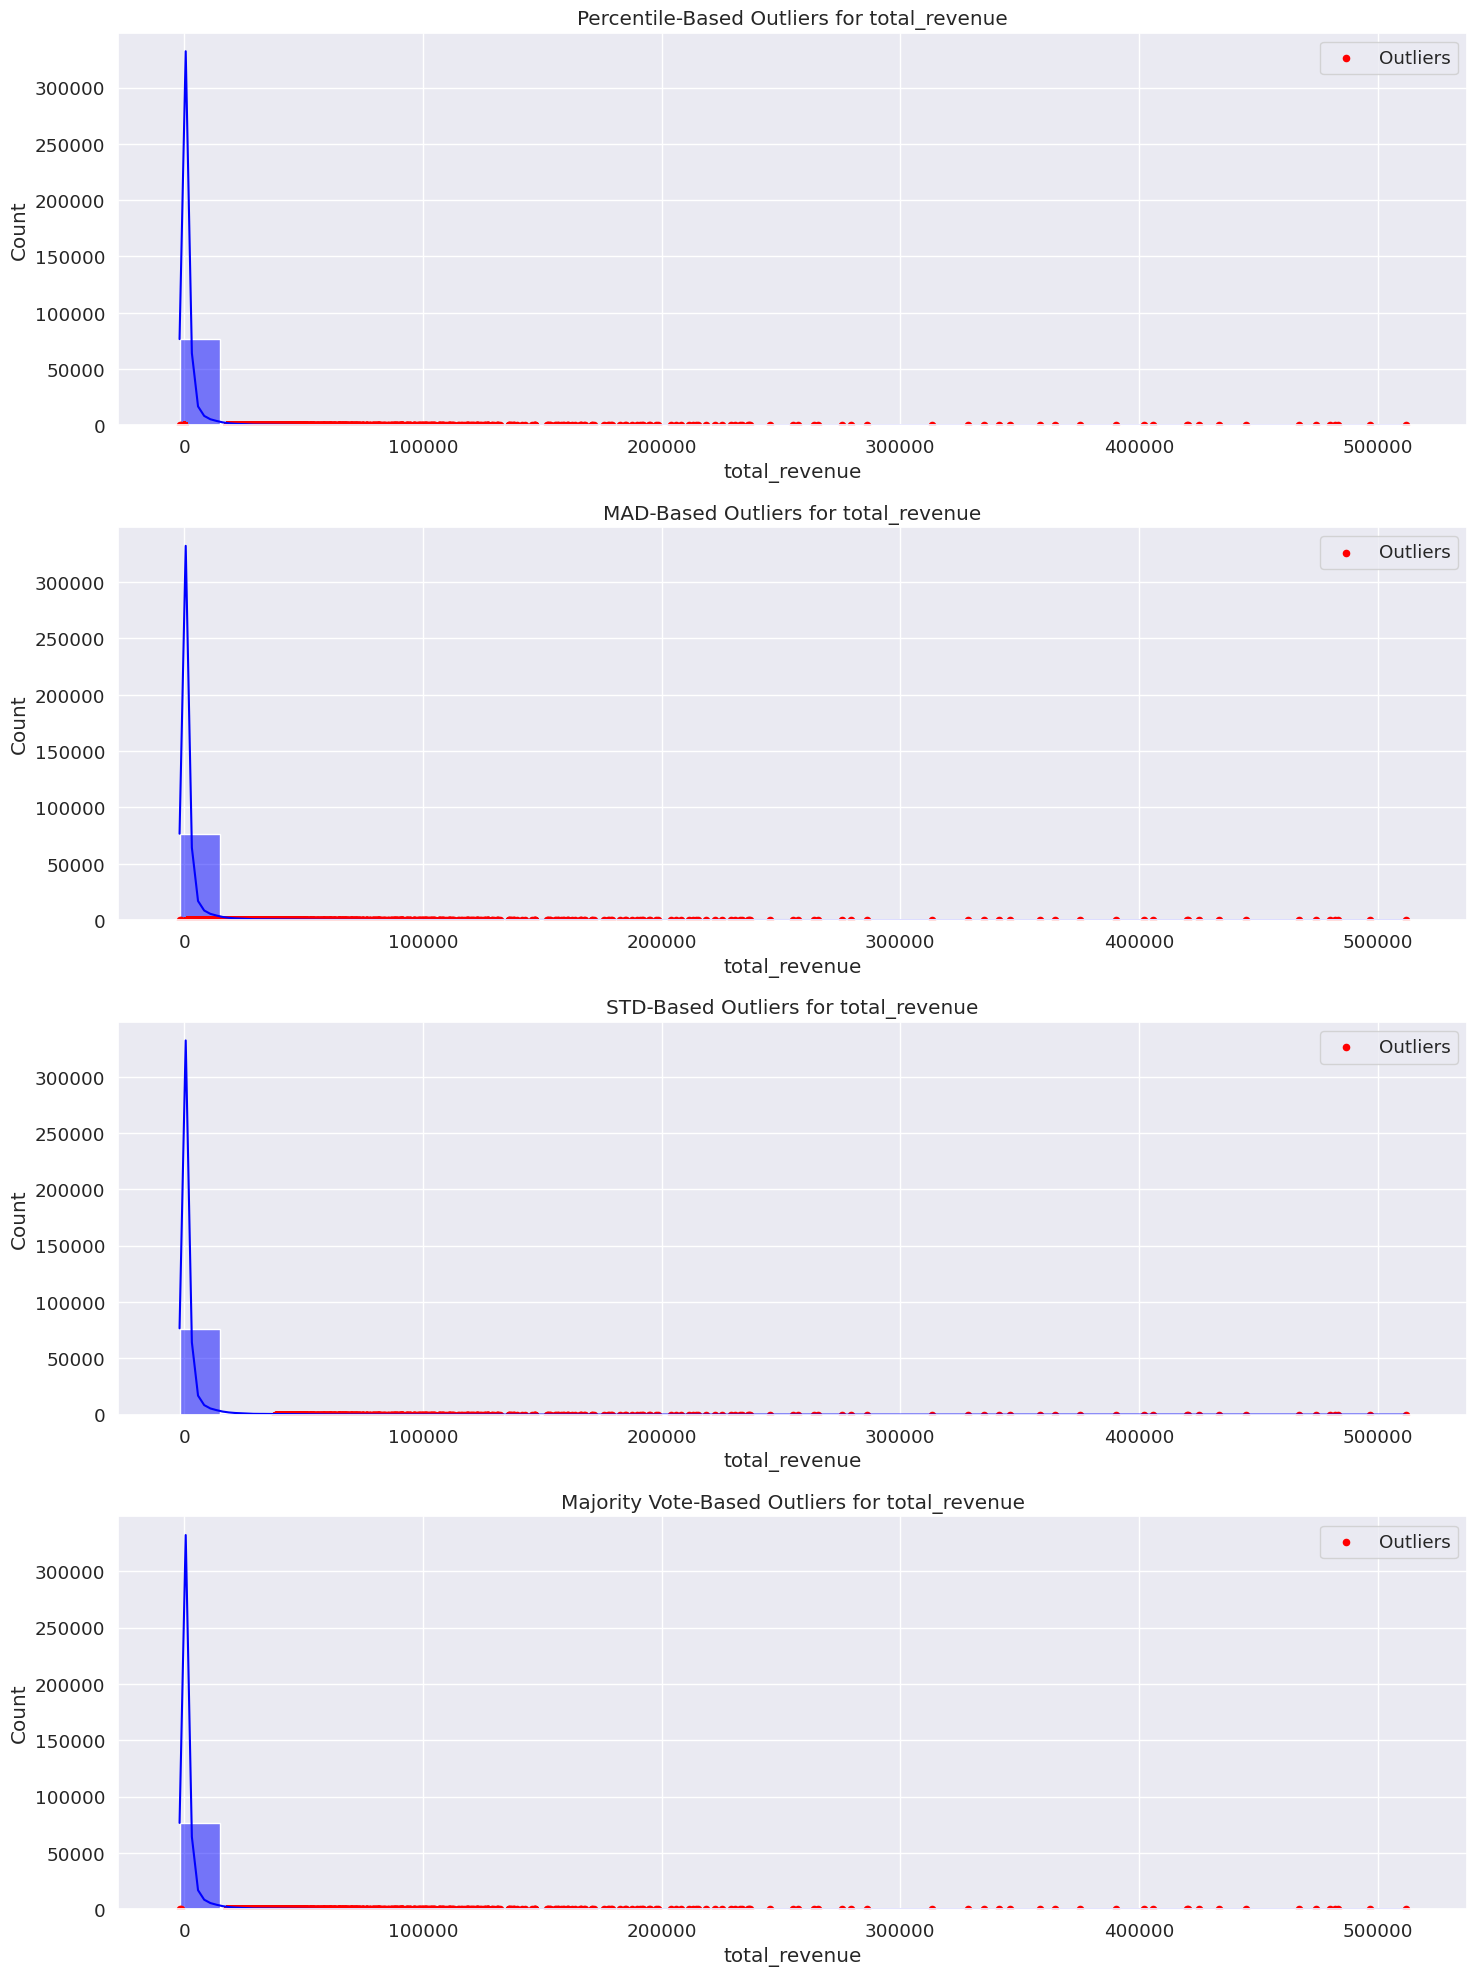

Processing Outliers for Feature: total_liabilities


<Figure size 1500x1000 with 0 Axes>

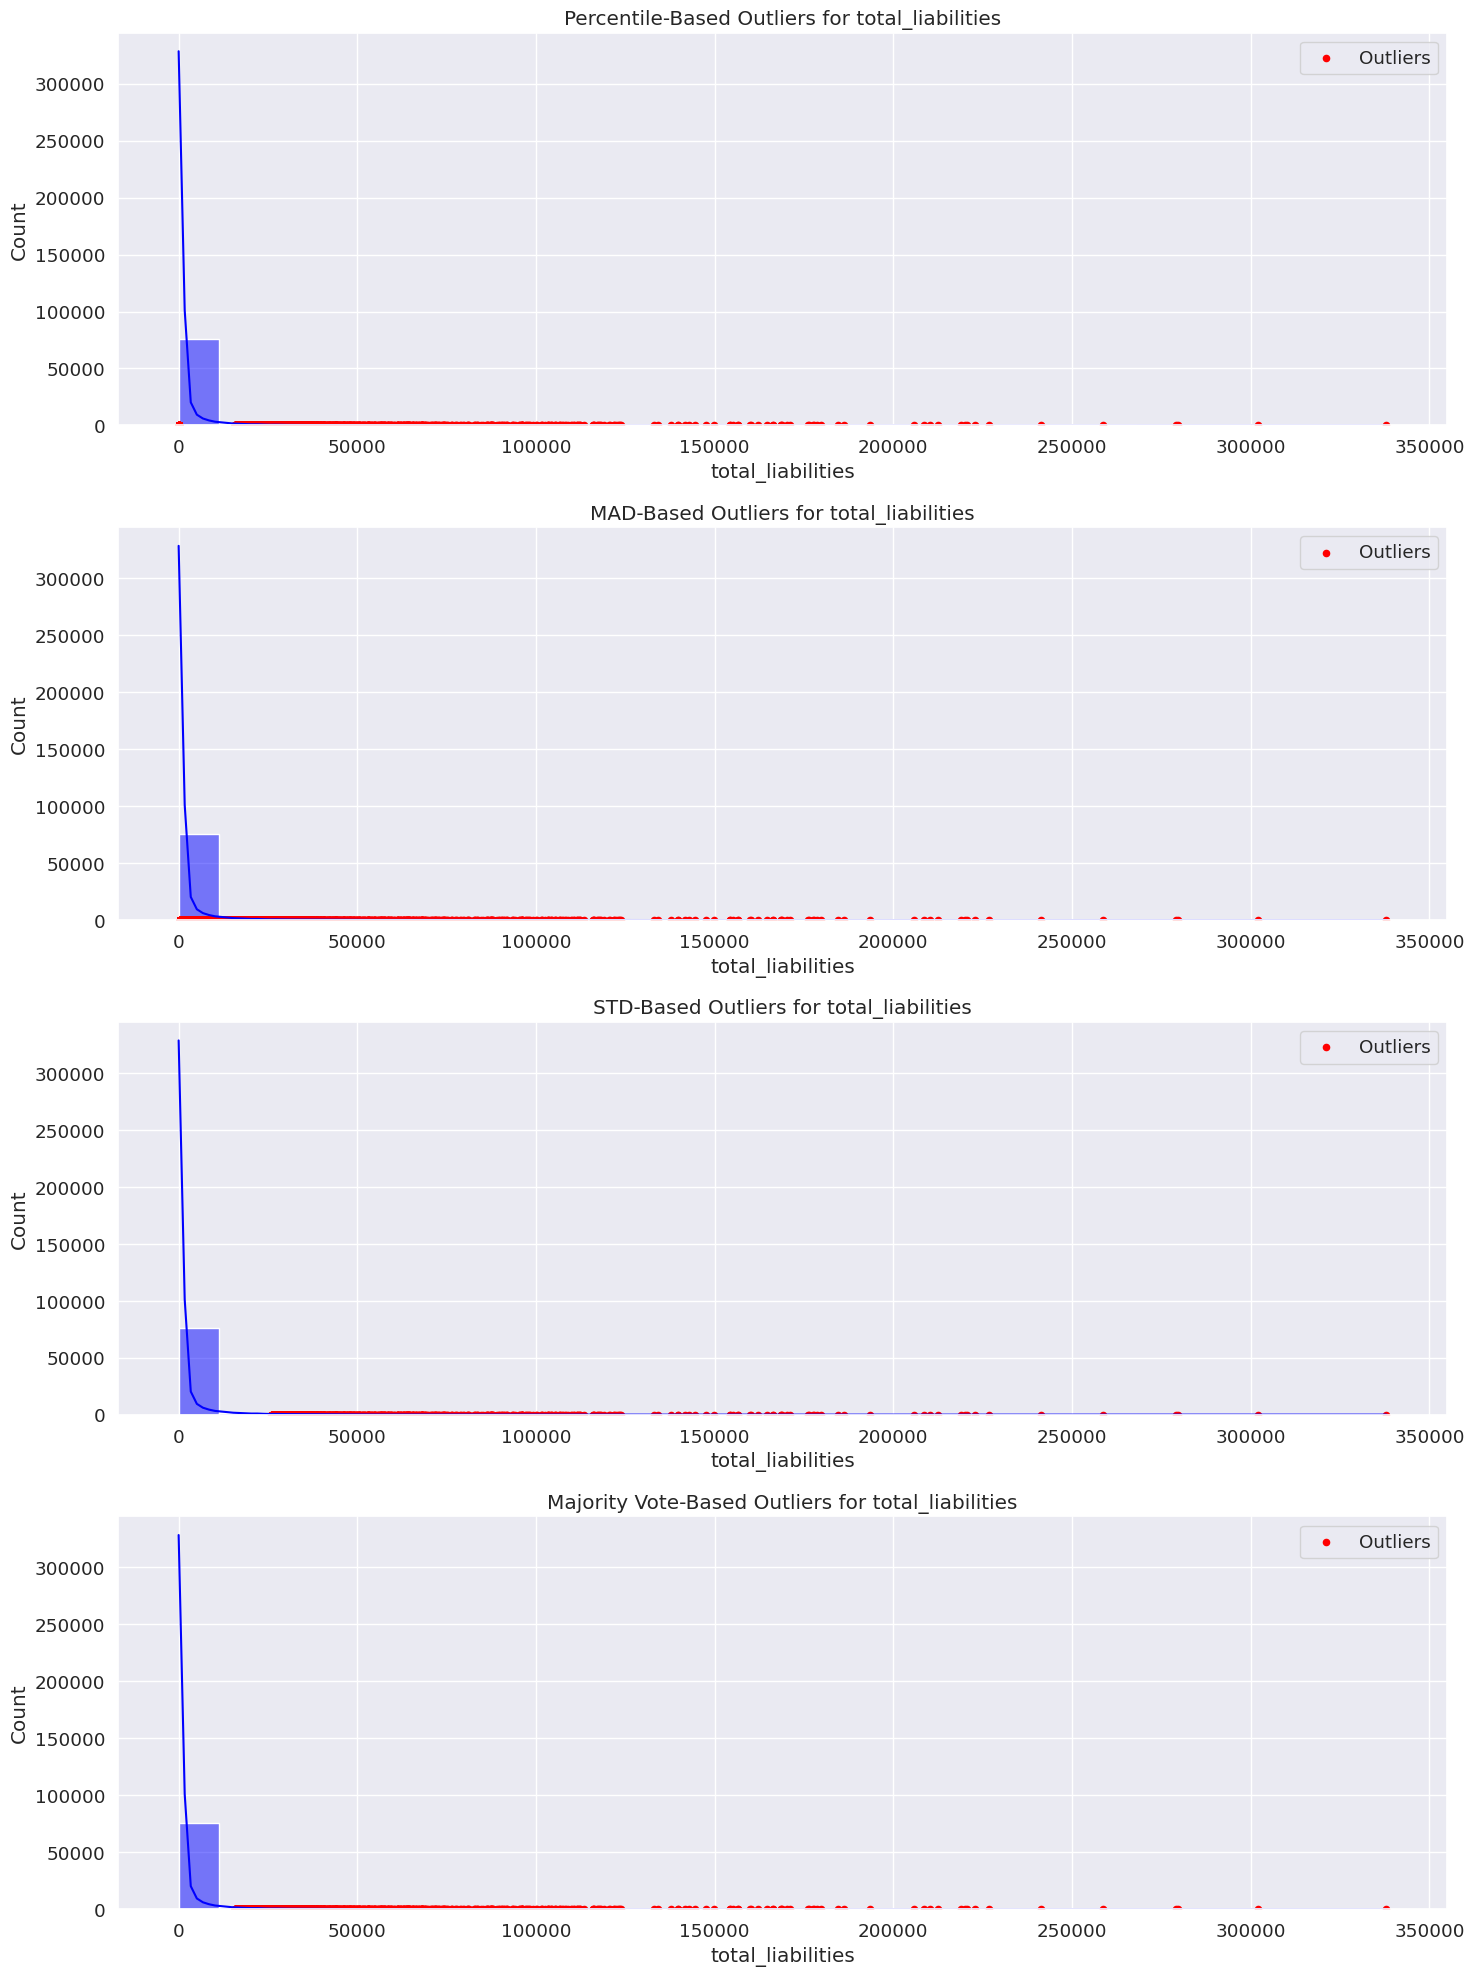

Processing Outliers for Feature: total_operating_expenses


<Figure size 1500x1000 with 0 Axes>

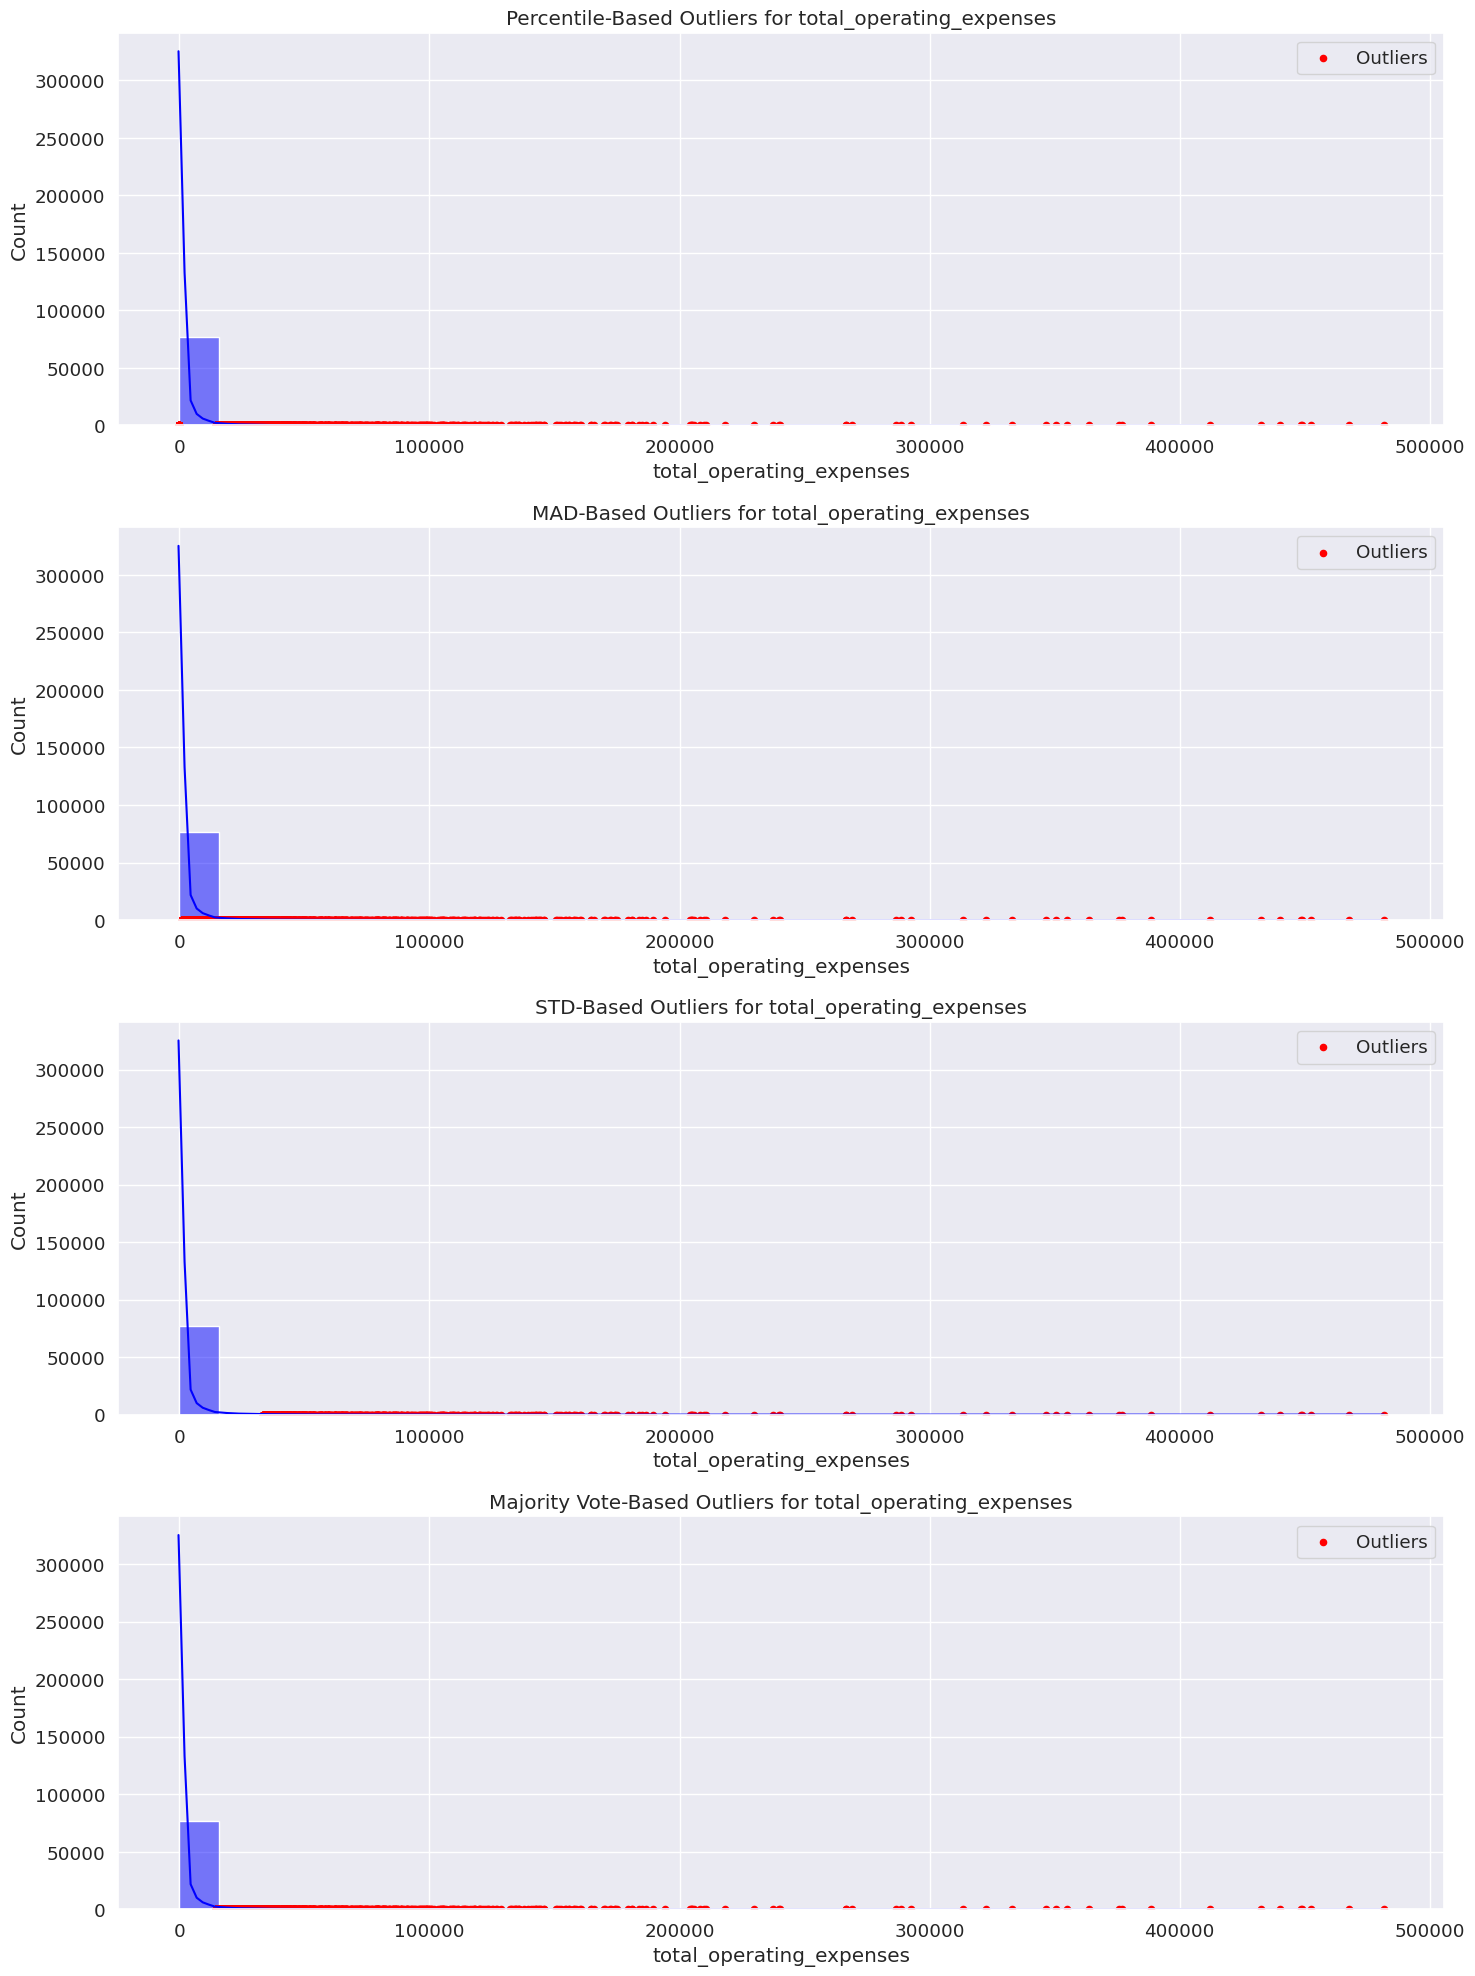

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection methods
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    mad_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / mad_y for y in points]
    return np.abs(modified_z_scores) > threshold

def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    return (np.abs(data - mean) > threshold * std)

def majority_vote_outlier(data):
    p_outlier = percentile_based_outlier(data)
    mad_outlier = mad_based_outlier(data)
    std_outlier = std_div(data)
    # Majority vote: If at least 2 methods classify as outlier, consider it an outlier
    return (p_outlier & mad_outlier) | (mad_outlier & std_outlier) | (p_outlier & std_outlier)

# Visualization of outliers
def plot_outlier(data, feature_name):
    plt.figure(figsize=(15, 10))
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

    for ax, func, title in zip(
        axes,
        [percentile_based_outlier, mad_based_outlier, std_div, majority_vote_outlier],
        ["Percentile-Based Outliers", "MAD-Based Outliers", "STD-Based Outliers", "Majority Vote-Based Outliers"]
    ):
        sns.histplot(data, kde=True, ax=ax, bins=30, color='blue')
        outliers = data[func(data)]
        ax.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers', s=20)
        ax.legend(loc="upper right")
        ax.set_title(f"{title} for {feature_name}")

    plt.tight_layout()
    plt.show()

# Numerical columns
numerical_columns = [
    'current_assets', 'cost_of_goods_sold', 'depreciation_amortization', 'ebitda',
    'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales',
    'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit',
    'total_current_liabilities', 'retained_earnings', 'total_revenue',
    'total_liabilities', 'total_operating_expenses'
]

# Apply outlier detection for all numerical columns
def detect_and_plot_outliers(dataset, columns):
    for feature in columns:
        print(f"Processing Outliers for Feature: {feature}")
        plot_outlier(dataset[feature], feature_name=feature)

# Example dataset (replace `dataset` with your DataFrame)
detect_and_plot_outliers(dataset, numerical_columns)


In [20]:
# Aggregate results from the four detection methods
def combine_outliers(dataset, column):
    percentile_outliers = percentile_based_outlier(dataset[column])
    mad_outliers = mad_based_outlier(dataset[column])
    std_outliers = std_div(dataset[column])
    majority_outliers = majority_vote_outlier(dataset[column])

    # Combine all methods into a final mask (majority vote)
    combined_outliers = (
        (percentile_outliers & mad_outliers) |
        (percentile_outliers & std_outliers) |
        (mad_outliers & std_outliers) |
        majority_outliers
    )
    return combined_outliers


In [21]:
# Replace outliers with median values
def handle_outliers(dataset, numerical_columns):
    for column in numerical_columns:
        outlier_mask = combine_outliers(dataset, column)  # Get combined outlier mask

        # Replace outliers with median
        median_value = dataset[column].median()
        dataset.loc[outlier_mask, column] = median_value

    return dataset


In [22]:
# List of numerical columns
numerical_columns = [
    'current_assets', 'cost_of_goods_sold', 'depreciation_amortization', 'ebitda',
    'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales',
    'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit',
    'total_current_liabilities', 'retained_earnings', 'total_revenue',
    'total_liabilities', 'total_operating_expenses'
]

# Handle outliers
dataset_cleaned = handle_outliers(dataset.copy(), numerical_columns)


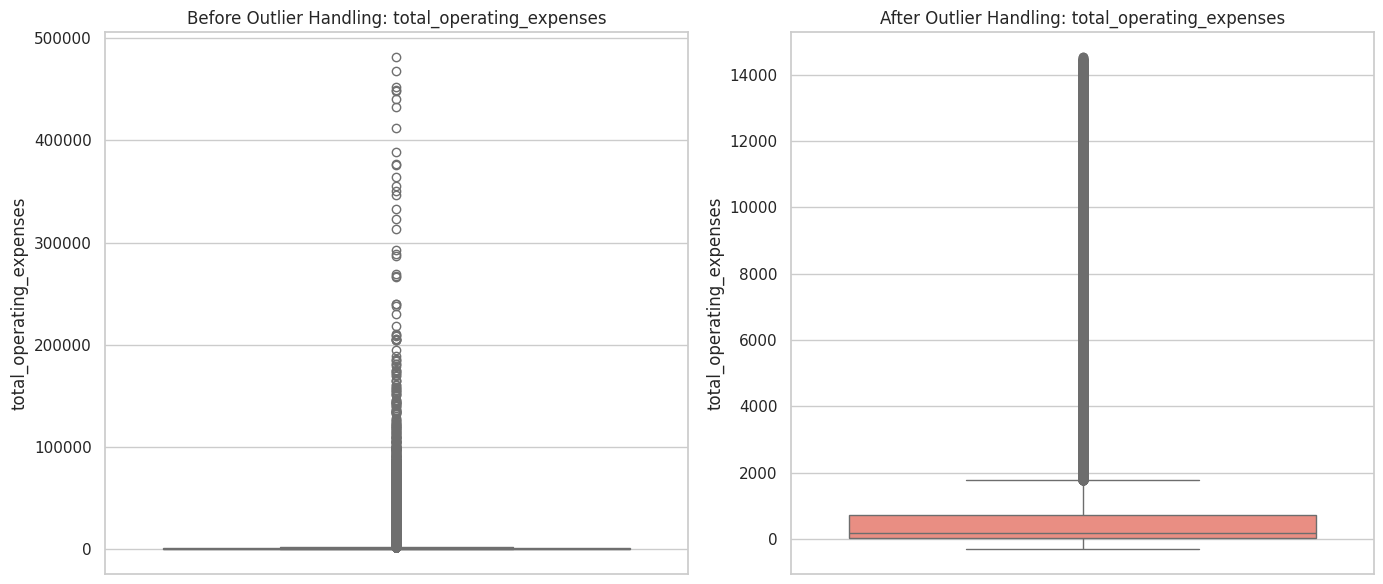

In [23]:
# Visualize the before and after of outlier handling for a specific column
def visualize_outlier_removal(column, original_dataset, cleaned_dataset):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(original_dataset[column], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Before Outlier Handling: {column}')

    sns.boxplot(cleaned_dataset[column], ax=axes[1], color='salmon')
    axes[1].set_title(f'After Outlier Handling: {column}')

    plt.tight_layout()
    plt.show()

# Example visualization for "total_operating_expenses"
visualize_outlier_removal(
    'total_operating_expenses',
    dataset,
    dataset_cleaned
)

1) market_value                   0.068739
2) retained_earnings              0.064095
3) depreciation_amortization      0.060936
4) current_assets                 0.059477
5) total_liabilities              0.059295
6) gross_profit                   0.058241
7) total_assets                   0.056445
8) total_receivables              0.056396
9) inventory                      0.055880
10) total_current_liabilities      0.055216
11) net_income                     0.055155
12) cost_of_goods_sold             0.053019
13) total_long_term_debt           0.051934
14) ebitda                         0.051033
15) ebit                           0.050861
16) total_operating_expenses       0.050616
17) total_revenue                  0.046372
18) net_sales                      0.046291


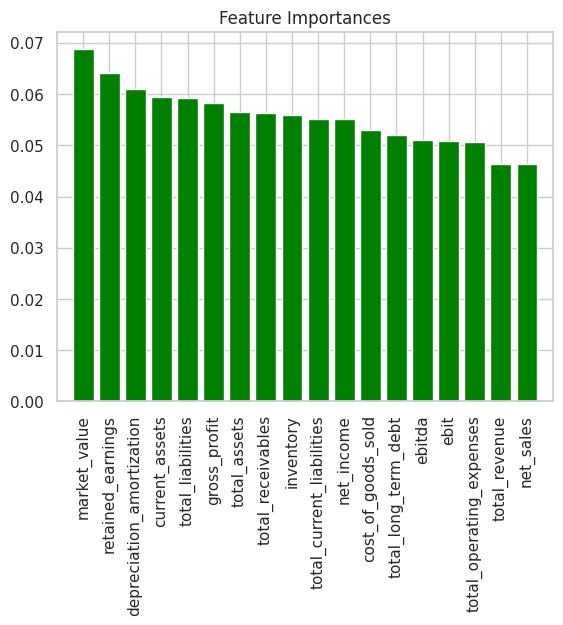

K-Nearest Neighbors Accuracy: 0.9360, ROC AUC Score: 0.7624
Logistic Regression Accuracy: 0.9320, ROC AUC Score: 0.6623


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9321, ROC AUC Score: 0.7114
Gradient Boosting Accuracy: 0.9326, ROC AUC Score: 0.7530
Random Forest Accuracy: 0.9357, ROC AUC Score: 0.8519


In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Define predictors and target variable
X = dataset.drop(['status_label', 'company_name', 'year'], axis=1)  # Exclude non-numerical columns and target column
y = dataset['status_label']

# Ensure you extract column names for feature labels
features_label = X.columns

# Initialize and fit the Random Forest model with reduced n_estimators
forest = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
forest.fit(X, y)

# Calculate feature importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Display the top features
for i in range(X.shape[1]):
    print(f"{i + 1}) {features_label[indices[i]]:30} {importances[indices[i]]:.6f}")

# Plot feature importance
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), features_label[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train and Evaluate Models
# 1. K-Nearest Neighbors
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2)
knMod.fit(X_train, y_train)
kn_score = knMod.score(X_test, y_test)
kn_auc = roc_auc_score(y_test, knMod.predict_proba(X_test)[:, 1])
print(f"K-Nearest Neighbors Accuracy: {kn_score:.4f}, ROC AUC Score: {kn_auc:.4f}")

# 2. Logistic Regression
glmMod = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100)
glmMod.fit(X_train, y_train)
glm_score = glmMod.score(X_test, y_test)
glm_auc = roc_auc_score(y_test, glmMod.predict_proba(X_test)[:, 1])
print(f"Logistic Regression Accuracy: {glm_score:.4f}, ROC AUC Score: {glm_auc:.4f}")

# 3. AdaBoost
adaMod = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=42)
adaMod.fit(X_train, y_train)
ada_score = adaMod.score(X_test, y_test)
ada_auc = roc_auc_score(y_test, adaMod.predict_proba(X_test)[:, 1])
print(f"AdaBoost Accuracy: {ada_score:.4f}, ROC AUC Score: {ada_auc:.4f}")

# 4. Gradient Boosting
gbMod = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbMod.fit(X_train, y_train)
gb_score = gbMod.score(X_test, y_test)
gb_auc = roc_auc_score(y_test, gbMod.predict_proba(X_test)[:, 1])
print(f"Gradient Boosting Accuracy: {gb_score:.4f}, ROC AUC Score: {gb_auc:.4f}")

# 5. Random Forest
rfMod = RandomForestClassifier(n_estimators=200, random_state=42)
rfMod.fit(X_train, y_train)
rf_score = rfMod.score(X_test, y_test)
rf_auc = roc_auc_score(y_test, rfMod.predict_proba(X_test)[:, 1])
print(f"Random Forest Accuracy: {rf_score:.4f}, ROC AUC Score: {rf_auc:.4f}")
